# 18 - Review Test Data

In [1]:
# TODO: Add prediction original probability to database/result

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import ttest_rel
import seaborn as sns
import json

from scipy.stats import chi2_contingency

import warnings
warnings.simplefilter(action='ignore')

In [3]:
input_dir = "../data/experiment_results/fix"

df_sessions = pd.read_csv(os.path.join(input_dir, "sessions.csv"))
df_rounds = pd.read_csv(os.path.join(input_dir, "rounds.csv"))
df_candidates = pd.read_csv(os.path.join(input_dir, "candidates.csv"))
df_manipulations = pd.read_csv(os.path.join(input_dir, "manipulations.csv"))

In [4]:
# --- Clean datasets ---
print("df_sessions")
display(df_sessions.head())

print("df_rounds")
display(df_rounds.head())

print("df_candidates")
display(df_candidates.head())

print("df_manipulations")
display(df_manipulations.head())

df_sessions


,session_id,user_group,session_time,feedback_time,feedback_answers,created_at
0,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,64.470650,0,"{'question1': 1, 'question2': 1, 'question3': ...",2025-05-05T15:23:13.044735
1,985933fb-f69f-4257-ae82-e558f7411cd9,badge,62.499771,0,"{'question1': 1, 'question2': 1, 'question3': ...",2025-05-05T15:23:12.675791
2,599f3430-02fd-42c6-b7e3-207ee9719f95,badge,106.592722,0,"{'question1': 1, 'question2': 1, 'question3': ...",2025-05-05T15:23:42.691655
3,c86ca01c-9b06-4805-adb7-91b1153c66b5,no-xai,48.483866,0,"{'question1': 1, 'question2': 1, 'question3': ...",2025-05-05T15:23:50.609282
4,b6c7cfd6-c748-470d-8f07-64d8746184e9,no-xai,48.957925,0,"{'question1': 1, 'question2': 1, 'question3': ...",2025-05-05T15:24:26.124375


df_rounds


,session_id,user_group,round_number,round_duration,candidate_count,invited_count,next_round_clicked
0,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,1,21.848,2,0,True
1,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,2,22.896,2,0,True
2,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,3,2.056,2,0,True
3,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,4,1.919,2,0,True
4,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,5,2.824,2,0,True


df_candidates


,session_id,user_group,round_number,candidate_id,name,invited,recommended,good_fit,manipulated,sex,race,age,degree_score,technical_skills_score,certifications_score,original_prediction,hover_events,manipulations
0,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,1,876,Ally Zhang,False,False,False,False,Female,White,41,1,0,2,NaN,[],[]
1,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,1,453,Marisa Frank,False,True,True,False,Female,White,38,1,0,5,NaN,[],[]
2,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,2,1304,Yusuf Flynn,False,False,False,False,Female,White,46,2,0,2,NaN,[],[]
3,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,2,1153,Jade Becker,False,True,True,False,Male,White,45,1,0,2,NaN,[],[]
4,1cf9a515-29d5-4684-8c0d-3efed6ed40f2,interactive,3,779,Carlee Lang,False,True,True,False,Male,White,54,1,0,2,NaN,[],[]


df_manipulations


,session_id,user_group,round_number,candidate_id,changed_attribute,new_value,prediction_before,prediction_after,original_prediction,is_good_fit,xai_features,timestamp
0,db066d9a-a123-4e66-a4c1-7853a5ff70b2,interactive,1,453,gender,Male,0.99,0.99,NaN,True,"[{'Feature': 'YearsExperience', 'SHAP Value': ...",2025-05-05T15:24:12.684Z
1,db066d9a-a123-4e66-a4c1-7853a5ff70b2,interactive,1,453,gender,Female,0.99,0.96,NaN,True,"[{'Feature': 'Basic Machinery Maintenance', 'S...",2025-05-05T15:24:20.663Z
2,db066d9a-a123-4e66-a4c1-7853a5ff70b2,interactive,1,453,gender,Male,0.96,0.99,NaN,True,"[{'Feature': 'YearsExperience', 'SHAP Value': ...",2025-05-05T15:24:23.779Z
3,db066d9a-a123-4e66-a4c1-7853a5ff70b2,interactive,1,453,gender,Female,0.99,0.96,NaN,True,"[{'Feature': 'Basic Machinery Maintenance', 'S...",2025-05-05T15:24:28.288Z
4,db066d9a-a123-4e66-a4c1-7853a5ff70b2,interactive,1,453,age,20-30,0.96,1.00,NaN,True,"[{'Feature': 'Problem Identification', 'SHAP V...",2025-05-05T15:24:39.263Z


## 1. **Descriptive Statistics & Sample Overview**

### 1.1 Participant Overview
- Number of sessions per group
- Average number of rounds and candidates per session

### 1.2 Timing Overview
- Average session time, feedback time
- Round durations (mean, std)

In [5]:
expected_user_groups = ['no-xai', 'badge', 'predictions', 'interactive']

In [6]:
# --- Cleanup
# Count number of rounds per session
rounds_count = df_rounds.groupby("session_id").agg(
    num_rounds=("round_number", "count")
).reset_index()

# Identify session_ids with more than 6 rounds
sessions_to_drop = rounds_count[rounds_count["num_rounds"] > 6]["session_id"]
print("Number of dropped sessions: ", len(sessions_to_drop))

# Filter all DataFrames to exclude these session_ids
df_sessions = df_sessions[~df_sessions["session_id"].isin(sessions_to_drop)]
df_rounds = df_rounds[~df_rounds["session_id"].isin(sessions_to_drop)]
df_candidates  = df_candidates[~df_candidates["session_id"].isin(sessions_to_drop)]
df_manipulations = df_manipulations[~df_manipulations["session_id"].isin(sessions_to_drop)]

print("Number of sessions: ", len(df_sessions))

Number of dropped sessions:  3
Number of sessions:  37


In [7]:
# Show sessions with more than 6 rounds
sessions_with_too_many_rounds = rounds_count[rounds_count["num_rounds"] > 6]
print("Sessions with more than 6 rounds:")
display(sessions_with_too_many_rounds)

Sessions with more than 6 rounds:


,session_id,num_rounds
8,291eb0c2-d7b4-4195-a7e0-b2d4b05b86ae,36
32,c4062ba2-7ec6-4dfb-a63e-873917f56d2b,12
38,fa41ac91-4125-4f69-a027-4207d182bfad,12


In [8]:
# TODO: Why are there 3 sessions with > 6 rounds?
# Force session reset on startapplication

In [9]:
# --- 1.1 Participant Overview ---
participant_overview = df_sessions.groupby("user_group").agg(
    sessions=("session_id", "nunique")
).reset_index()

# Number of rounds and candidates per session
rounds_per_session = df_rounds.groupby("session_id").agg(
    num_rounds=("round_number", "count")
).reset_index()

# Add percentage of total sessions
total_sessions = participant_overview["sessions"].sum()
participant_overview["session_percentage"] = (
    participant_overview["sessions"] / total_sessions * 100
).round(2)

candidates_per_session = df_candidates.groupby("session_id").agg(
    num_candidates=("candidate_id", "count")
).reset_index()

# Merge into one overview
rounds_candidates_per_session = rounds_per_session.merge(
    candidates_per_session, on="session_id"
).merge(
    df_sessions[["session_id", "user_group"]], on="session_id"
)

avg_rounds_candidates = rounds_candidates_per_session.groupby("user_group").agg(
    avg_rounds_per_session=("num_rounds", "mean"),
    avg_candidates_per_session=("num_candidates", "mean")
).reset_index()

In [10]:
# --- 1.2 Timing Overview ---
timing_overview = df_sessions.groupby("user_group").agg(
    avg_session_time=("session_time", "mean"),
    avg_feedback_time=("feedback_time", "mean")
).reset_index()

round_duration_stats = df_rounds.groupby("user_group").agg(
    avg_round_duration=("round_duration", "mean"),
    std_round_duration=("round_duration", "std")
).reset_index()

In [11]:
# Merge all overviews on 'user_group'
merged_overview = participant_overview.merge(
    avg_rounds_candidates, on="user_group"
).merge(
    timing_overview, on="user_group"
).merge(
    round_duration_stats, on="user_group"
)

group_order = ["no-xai", "badge", "predictions", "interactive"]
merged_overview["user_group"] = pd.Categorical(
    merged_overview["user_group"],
    categories=group_order,
    ordered=True
)
merged_overview = merged_overview.sort_values("user_group").reset_index(drop=True)

In [12]:
merged_overview

,user_group,sessions,session_percentage,avg_rounds_per_session,avg_candidates_per_session,avg_session_time,avg_feedback_time,avg_round_duration,std_round_duration
0,no-xai,9,25.00,6.0,12.0,109.757123,0.0,16.337204,14.637285
1,badge,13,36.11,6.0,12.0,118.010409,0.0,14.783192,19.349238
2,predictions,5,13.89,6.0,12.0,83.202530,0.0,12.480567,13.722349
3,interactive,9,25.00,5.4,10.8,749.483803,0.0,18.284667,27.545083


In [13]:
# TODO: Is there a reason for unequal distribution?

In [14]:
# TODO: Drop rows by time / attention

## 2. **AI Influence on Decision-Making**

### 2.1 Recommendation Acceptance Rate
> Are AI-recommended candidates more likely to be invited?

Metric:
```
% of recommended candidates that were invited
Grouped by: user_group
```

In [15]:
# Ensure boolean columns are correctly interpreted
df_candidates['recommended'] = df_candidates['recommended'].astype(bool)
df_candidates['invited'] = df_candidates['invited'].astype(bool)

In [16]:
# --- 2.1 Recommendation Acceptance Rate ---
# % of recommended candidates that were invited
df_rounds['next_round_clicked'] = df_rounds['next_round_clicked'].astype(bool)
df_candidates['recommended'] = df_candidates['recommended'].astype(bool)
df_candidates['invited'] = df_candidates['invited'].astype(bool)

# Compute recommendation acceptance stats per user group
recommendation_acceptance_by_group = (
    df_candidates[df_candidates['recommended']]
    .groupby('user_group')
    .agg(
        num_invited_recommended_candidates=('invited', 'sum'),
        num_total_recommended_candidates=('invited', 'count')
    )
    .assign(
        recommendation_acceptance_rate_percent=lambda df: 100 * df['num_invited_recommended_candidates'] / df['num_total_recommended_candidates']
    )
    .reset_index()
)

# Calculate how many sessions had at least one next-click, by user group
sessions_with_any_next_click = (
    df_rounds.groupby('session_id')['next_round_clicked']
    .any()
    .reset_index(name='has_next_click')
    .merge(df_sessions[['session_id', 'user_group']], on='session_id')
    .groupby('user_group')['has_next_click']
    .mean()
    .reset_index(name='percent_sessions_with_next_click')
)
sessions_with_any_next_click['percent_sessions_with_next_click'] *= 100

# Count total next clicks and average per session by group
total_next_clicks_by_group = (
    df_rounds[df_rounds['next_round_clicked']]
    .groupby('user_group')
    .size()
    .reset_index(name='total_next_clicks')
)

total_sessions_by_group = (
    df_sessions
    .groupby('user_group')
    .size()
    .reset_index(name='num_sessions')
)

click_stats_by_group = (
    total_next_clicks_by_group
    .merge(total_sessions_by_group, on='user_group', how='outer')
    .fillna(0)
)
click_stats_by_group['average_next_clicks_per_session'] = click_stats_by_group['total_next_clicks'] / click_stats_by_group['num_sessions']

# Merge all metrics into a single summary table
user_group_behavior_summary = (
    recommendation_acceptance_by_group
    .merge(click_stats_by_group, on='user_group', how='outer')
    .merge(sessions_with_any_next_click, on='user_group', how='outer')
)

user_group_behavior_summary = user_group_behavior_summary[
    [
        'user_group',
        'num_invited_recommended_candidates',
        'num_total_recommended_candidates',
        'recommendation_acceptance_rate_percent',
        'total_next_clicks',
        'num_sessions',
        'average_next_clicks_per_session',
        'percent_sessions_with_next_click'
    ]
].fillna(0).sort_values('user_group')

# Convert to categorical with ordering
user_group_behavior_summary['user_group'] = pd.Categorical(
    user_group_behavior_summary['user_group'],
    categories=expected_user_groups,
    ordered=True
)
user_group_behavior_summary = user_group_behavior_summary.sort_values('user_group')
user_group_behavior_summary

,user_group,num_invited_recommended_candidates,num_total_recommended_candidates,recommendation_acceptance_rate_percent,total_next_clicks,num_sessions,average_next_clicks_per_session,percent_sessions_with_next_click
2,no-xai,20,54,37.037037,6.0,9,0.666667,11.111111
0,badge,36,78,46.153846,8.0,13,0.615385,15.384615
3,predictions,14,30,46.666667,0.0,5,0.000000,0.000000
1,interactive,25,48,52.083333,7.0,10,0.700000,20.000000


In [17]:
df_rounds['next_round_clicked'] = df_rounds['next_round_clicked'].astype(bool)

skips_by_user_group_and_round = df_rounds[df_rounds['next_round_clicked']].groupby(
    ['user_group', 'round_number']
).size().unstack(fill_value=0)

skips_by_user_group_and_round = skips_by_user_group_and_round.reindex(expected_user_groups).fillna(0).astype(int)
skips_by_user_group_and_round = skips_by_user_group_and_round.reindex(sorted(skips_by_user_group_and_round.columns), axis=1)
skips_by_user_group_and_round

round_number,1,2,3,4,5,6
user_group,,,,,,
no-xai,1,1,1,1,1,1
badge,1,2,1,1,2,1
predictions,0,0,0,0,0,0
interactive,1,1,2,1,1,1


> If users skipped rounds (no candidates invited), how similar were the candidates in Degree, Technical Skills, Certifications?

In [18]:
# Identify rounds where no candidates were invited (i.e., skipped rounds)
rounds_with_no_invites = df_candidates.groupby(
    ['session_id', 'round_number']
).agg(
    any_candidate_invited=('invited', 'sum')
).reset_index()

skipped_rounds = rounds_with_no_invites[rounds_with_no_invites['any_candidate_invited'] == 0][['session_id', 'round_number']]

# Get candidate info for skipped rounds only
candidates_in_skipped_rounds = df_candidates.merge(
    skipped_rounds, on=['session_id', 'round_number']
)

# Extract relevant features for similarity analysis
skipped_round_feature_data = candidates_in_skipped_rounds[[
    'session_id', 'round_number', 'technical_skills_score', 'certifications_score'
]]

# Compute standard deviation per round as proxy for candidate diversity
skipped_round_similarity_stats = skipped_round_feature_data.groupby(
    ['session_id', 'round_number']
).agg(
    std_technical_skills_score=('technical_skills_score', 'std'),
    std_certifications_score=('certifications_score', 'std')
).reset_index()

# Combine both std metrics into a single similarity score
skipped_round_similarity_stats['average_similarity_score'] = (
    skipped_round_similarity_stats['std_technical_skills_score'] + 
    skipped_round_similarity_stats['std_certifications_score']
) / 2

# Bin rounds into qualitative similarity categories
skipped_round_similarity_stats['similarity_category'] = pd.cut(
    skipped_round_similarity_stats['average_similarity_score'],
    bins=[-0.01, 0.5, 1.5, float('inf')],
    labels=['Very Similar', 'Moderately Similar', 'Diverse']
)

# Count how many skipped rounds fall into each similarity category
similarity_category_summary = skipped_round_similarity_stats['similarity_category'].value_counts().reset_index()
similarity_category_summary.columns = ['similarity_category', 'num_skipped_rounds']
similarity_category_summary['percent'] = 100 * similarity_category_summary['num_skipped_rounds'] / similarity_category_summary['num_skipped_rounds'].sum()

similarity_category_summary = similarity_category_summary.sort_values('similarity_category')
similarity_category_summary

,similarity_category,num_skipped_rounds,percent
1,Very Similar,10,47.619048
0,Moderately Similar,11,52.380952
2,Diverse,0,0.000000


| Category               | Meaning                                                                 |
| ---------------------- | ----------------------------------------------------------------------- |
| **Very Similar**       | Both candidates had nearly identical scores. Hard to distinguish.       |
| **Moderately Similar** | Small but noticeable differences between the candidates.                |
| **Diverse**            | Candidates had clearly different profiles. Easy to compare or contrast. |

> Is the recommended candidate better in terms of skills, certificates, degree when user skips round?

In [19]:
# Count number of invited candidates per round
round_invite_counts = df_candidates.groupby(['session_id', 'round_number'])['invited'].sum().reset_index()
valid_decision_rounds = round_invite_counts[round_invite_counts['invited'] == 1]

# Join back to full candidate data
decided_candidates = df_candidates.merge(
    valid_decision_rounds[['session_id', 'round_number']],
    on=['session_id', 'round_number']
)

invited = decided_candidates[decided_candidates['invited'] == True]
not_invited = decided_candidates[decided_candidates['invited'] == False]

feature_diff = invited[['technical_skills_score', 'certifications_score']].mean() - \
               not_invited[['technical_skills_score', 'certifications_score']].mean()

comparison = invited.set_index(['session_id', 'round_number'])[['technical_skills_score', 'certifications_score']].subtract(
    not_invited.set_index(['session_id', 'round_number'])[['technical_skills_score', 'certifications_score']]
).reset_index()
comparison

,session_id,round_number,technical_skills_score,certifications_score
0,985933fb-f69f-4257-ae82-e558f7411cd9,1,0,0
1,985933fb-f69f-4257-ae82-e558f7411cd9,3,0,0
2,985933fb-f69f-4257-ae82-e558f7411cd9,4,0,3
3,985933fb-f69f-4257-ae82-e558f7411cd9,6,0,-3
4,599f3430-02fd-42c6-b7e3-207ee9719f95,1,0,0
...,...,...,...,...
178,2203febc-aad7-48bd-954a-ff9d70f7c352,4,0,-3
179,2203febc-aad7-48bd-954a-ff9d70f7c352,6,0,3
180,b3a52c75-a24f-4ffc-8849-5f097464bae2,2,0,-2
181,b3a52c75-a24f-4ffc-8849-5f097464bae2,4,0,-3


In [20]:
# Get valid decision rounds (exactly 1 candidate invited)
round_invite_counts = df_candidates.groupby(['session_id', 'round_number'])['invited'].sum().reset_index()
valid_decision_rounds = round_invite_counts[round_invite_counts['invited'] == 1]

# Join back to full candidate data
decided_candidates = df_candidates.merge(
    valid_decision_rounds[['session_id', 'round_number']],
    on=['session_id', 'round_number']
)

# Split into invited and not invited
invited = decided_candidates[decided_candidates['invited'] == True].set_index(['session_id', 'round_number'])
not_invited = decided_candidates[decided_candidates['invited'] == False].set_index(['session_id', 'round_number'])

# Select features to compare
features = ['technical_skills_score', 'certifications_score', 'degree_score']

# Compute per-round differences
feature_deltas = invited[features] - not_invited[features]

# Compute win rates, mean differences, and p-values
summary_data = []
for feature in features:
    diffs = feature_deltas[feature].dropna()
    mean_diff = diffs.mean()
    p_value = ttest_rel(invited[feature], not_invited[feature], nan_policy='omit').pvalue
    percent_invited_higher = (diffs > 0).mean() * 100
    summary_data.append({
        'feature': feature,
        'mean_difference': round(mean_diff, 3),
        'invited_higher_%': round(percent_invited_higher, 1),
        'p_value': round(p_value, 4)
    })

feature_selection_summary = pd.DataFrame(summary_data).sort_values('invited_higher_%', ascending=False)
feature_selection_summary

,feature,mean_difference,invited_higher_%,p_value
1,certifications_score,0.874,42.1,0.0000
2,degree_score,0.044,20.2,0.3261
0,technical_skills_score,0.000,0.0,NaN


In [21]:
# Join back to full candidate data
decided_candidates = df_candidates.merge(
    valid_decision_rounds[['session_id', 'round_number']],
    on=['session_id', 'round_number']
)

# Select features to compare
features = ['technical_skills_score', 'certifications_score', 'degree_score']
grouped_summaries = []

# Loop over user groups
for group_name, group_df in decided_candidates.groupby('user_group'):
    invited = group_df[group_df['invited'] == True].set_index(['session_id', 'round_number'])
    not_invited = group_df[group_df['invited'] == False].set_index(['session_id', 'round_number'])

    feature_deltas = invited[features] - not_invited[features]
    group_summary = []

    for feature in features:
        diffs = feature_deltas[feature].dropna()
        if len(diffs) > 1:
            mean_diff = diffs.mean()
            p_value = ttest_rel(invited[feature], not_invited[feature], nan_policy='omit').pvalue
            percent_invited_higher = (diffs > 0).mean() * 100
        else:
            mean_diff, p_value, percent_invited_higher = float('nan'), float('nan'), float('nan')

        group_summary.append({
            'user_group': group_name,
            'feature': feature,
            'mean_difference': round(mean_diff, 3),
            'invited_higher_%': round(percent_invited_higher, 1),
            'p_value': round(p_value, 4)
        })

    grouped_summaries.extend(group_summary)

grouped_feature_selection_summary = pd.DataFrame(grouped_summaries).sort_values(['user_group', 'invited_higher_%'], ascending=[True, False])

# Convert to categorical with ordering
grouped_feature_selection_summary['user_group'] = pd.Categorical(
    grouped_feature_selection_summary['user_group'],
    categories=expected_user_groups,
    ordered=True
)
grouped_feature_selection_summary = grouped_feature_selection_summary.sort_values('user_group')
grouped_feature_selection_summary

,user_group,feature,mean_difference,invited_higher_%,p_value
7,no-xai,certifications_score,0.833,35.4,0.0210
8,no-xai,degree_score,0.104,29.2,0.3020
6,no-xai,technical_skills_score,0.000,0.0,NaN
1,badge,certifications_score,1.071,47.1,0.0006
2,badge,degree_score,0.014,17.1,0.8366
0,badge,technical_skills_score,0.000,0.0,NaN
10,predictions,certifications_score,1.000,50.0,0.0277
11,predictions,degree_score,0.000,13.3,1.0000
9,predictions,technical_skills_score,0.000,0.0,NaN
4,interactive,certifications_score,0.429,34.3,0.2514


In [22]:

# Only keep recommended candidates from AI-exposed groups
ai_groups = ['badge', 'predictions', 'interactive']
recommended_ai = df_candidates[
    (df_candidates['recommended'] == True) &
    (df_candidates['user_group'].isin(ai_groups))
].copy()

# Create contingency table: user_group x invited status
contingency_table = pd.crosstab(
    recommended_ai['user_group'],
    recommended_ai['invited']
)

# Enforce consistent group order
expected_ai_groups = ['badge', 'predictions', 'interactive']
contingency_table = contingency_table.reindex(expected_ai_groups)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table.fillna(0))

# Format test results
chi_square_summary = pd.DataFrame({
    'Metric': ['Chi-square statistic', 'Degrees of freedom', 'p-value'],
    'Value': [round(chi2, 3), dof, round(p, 4)]
})

print("Do AI-exposed user groups differ in how often they invite recommended candidates?")
display(contingency_table)
display(chi_square_summary)

Do AI-exposed user groups differ in how often they invite recommended candidates?


invited,False,True
user_group,,
badge,42,36
predictions,16,14
interactive,23,25


,Metric,Value
0,Chi-square statistic,0.4480
1,Degrees of freedom,2.0000
2,p-value,0.7993


There is no statistically significant difference between the AI-exposed user groups (badge, predictions, interactive) in how often they invite recommended candidates. Even though the groups saw different types of AI support (badges, prediction probabilities, interactive manipulation), they ended up trusting and following AI recommendations at similar rates.


### 2.2 Trust in AI
> Do users invite non-recommended candidates?

Metric:
```
% of invited candidates that were also recommended
Grouped by: user_group
```


In [23]:
# --- 2.2 Trust in AI ---
# % of invited candidates that were also recommended
invited_candidates = df_candidates[df_candidates['invited']]

# Aggregate: how many invited were also recommended
trust_in_ai = (
    invited_candidates
    .groupby('user_group')
    .agg(
        invited_and_recommended=('recommended', 'sum'),
        total_invited=('recommended', 'count')
    )
    .assign(
        trust_rate_percent=lambda df: 100 * df['invited_and_recommended'] / df['total_invited']
    )
    .reset_index()
)

# Force inclusion of all expected groups, even if empty
expected_user_groups = ['no-xai', 'badge', 'predictions', 'interactive']
trust_in_ai['user_group'] = pd.Categorical(trust_in_ai['user_group'], categories=expected_user_groups, ordered=True)
trust_in_ai = trust_in_ai.sort_values('user_group')

# Set trust rate for "no-xai" group to NaN
trust_in_ai.loc[trust_in_ai['user_group'] == 'no-xai', 'trust_rate_percent'] = float('nan')
trust_in_ai

,user_group,invited_and_recommended,total_invited,trust_rate_percent
2,no-xai,20,48,NaN
0,badge,36,70,51.428571
3,predictions,14,30,46.666667
1,interactive,25,41,60.975610


> Do users invite recommended candidates?

In [24]:
# Filter to invited candidates only and exclude no-xai group
invited_candidates_ai_groups = df_candidates[
    (df_candidates['invited']) &
    (df_candidates['user_group'].isin(['badge', 'predictions', 'interactive']))
].copy()

# Build contingency table: rows = user groups, columns = recommended / not recommended
contingency_table = pd.crosstab(
    invited_candidates_ai_groups['user_group'],
    invited_candidates_ai_groups['recommended']
)

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Format result for reporting
trust_chi_square_summary = pd.DataFrame({
    'Metric': ['Chi-square statistic', 'Degrees of freedom', 'p-value'],
    'Value': [round(chi2, 3), dof, round(p, 4)]
})

# Ensure consistent ordering for readability
contingency_table.index = pd.Categorical(contingency_table.index, categories=['badge', 'predictions', 'interactive'], ordered=True)
contingency_table = contingency_table.sort_index()

print("Do AI-exposed user groups differ in how often they trust recommendations (among invited candidates)?")
display(contingency_table)
display(trust_chi_square_summary)

Do AI-exposed user groups differ in how often they trust recommendations (among invited candidates)?


recommended,False,True
badge,34,36
predictions,16,14
interactive,16,25


,Metric,Value
0,Chi-square statistic,1.5980
1,Degrees of freedom,2.0000
2,p-value,0.4497


There is no statistically significant difference at the conventional 0.05 level between AI-exposed user groups (badge, predictions, interactive) in how often they invite recommended vs. non-recommended candidates among those they invited.

### 2.3 Confidence Threshold Effect

> Do users follow recommendations more when the AI’s prediction probability is high?

Group by confidence bins (e.g. 0.6–0.7, 0.7–0.8...) and compute invite rates.

In [25]:
# TODO: prediction probability missing in output

In [26]:
# # Extract proper float from prediction_probability field
# df_manipulations['prediction_probability'] = df_manipulations['prediction_probability'].apply(
#     lambda x: x if isinstance(x, float) else x.get('value') if isinstance(x, dict) else None
# )

# # Get prediction probabilities for AI-enabled user groups only
# prediction_confidence = df_manipulations[
#     df_manipulations['user_group'].isin(['predictions', 'interactive'])
# ][['session_id', 'round_number', 'candidate_id', 'prediction_probability']].drop_duplicates()

# # Merge confidence info into candidate dataframe
# df_confidence_analysis = df_candidates.merge(
#     prediction_confidence,
#     on=['session_id', 'round_number', 'candidate_id'],
#     how='left'
# )

# # Filter to recommended candidates in AI-enabled groups with valid prediction probability
# df_confidence_analysis = df_confidence_analysis[
#     (df_confidence_analysis['user_group'].isin(['predictions', 'interactive'])) &
#     (df_confidence_analysis['recommended']) &
#     (df_confidence_analysis['prediction_probability'].notna())
# ]

# # Define confidence bins
# confidence_bins = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# confidence_labels = ['0.5–0.6', '0.6–0.7', '0.7–0.8', '0.8–0.9', '0.9–1.0']

# # Assign confidence bins
# df_confidence_analysis['confidence_bin'] = pd.cut(
#     df_confidence_analysis['prediction_probability'],
#     bins=confidence_bins,
#     labels=confidence_labels,
#     include_lowest=True
# )

# # Compute invite rate per confidence bin
# confidence_bin_stats = df_confidence_analysis.groupby('confidence_bin').agg(
#     total_recommended_candidates=('candidate_id', 'count'),
#     invited_candidates=('invited', 'sum')
# ).reset_index()

# confidence_bin_stats['invite_rate_percent'] = 100 * confidence_bin_stats['invited_candidates'] / confidence_bin_stats['total_recommended_candidates']
# confidence_bin_stats

In [27]:
# TODO: Does higher AI confidence lead to higher invite rates?
# Add Chi-square test for trend or Cochran-Armitage trend test (if available) across confidence bins.
# Alternative: Spearman correlation between confidence_bin and invite_rate.

## 3. **Manipulation Behavior (Manipulation Group Only)**

### 3.1 Manipulated Attribute Frequency
> Which attributes do users change most often?

- Distribution of `changed_attribute`

In [28]:
# --- 3.1 Manipulated Attribute Frequency ---
# Count how many times each attribute was changed across all manipulation events
manip_attr_freq = df_manipulations['changed_attribute'].value_counts().reset_index()
manip_attr_freq.columns = ['changed_attribute', 'count']
print("Manipulated Attribute Frequency:")
manip_attr_freq

Manipulated Attribute Frequency:


,changed_attribute,count
0,race,34
1,age,30
2,gender,14



### 3.2 GoodFit Shift Analysis
> Do users “game” the AI?

- Δ prediction probability (before vs. after)
- Label change counts (`is_good_fit: False → True`)
- SHAP contribution differences

In [29]:
# # Ensure prediction_probability is parsed as dict
# def parse_prediction_dict(x):
#     if isinstance(x, dict):
#         return x
#     try:
#         return json.loads(x.replace("'", '"'))
#     except:
#         return {}

# df_manipulations['prediction_probability'] = df_manipulations['prediction_probability'].apply(parse_prediction_dict)
# df_manipulations['prediction_before'] = df_manipulations['prediction_probability'].apply(lambda x: x.get('before'))
# df_manipulations['prediction_after'] = df_manipulations['prediction_probability'].apply(lambda x: x.get('after'))

# # Compute delta between first and last manipulation per candidate/attribute
# delta_values = []
# for _, group in df_manipulations.groupby(['candidate_id', 'changed_attribute']):
#     before = group.iloc[0]['prediction_before']
#     after = group.iloc[-1]['prediction_after']
#     if before is not None and after is not None:
#         delta_values.append(after - before)

# prediction_deltas = pd.Series(delta_values)
# delta_summary = prediction_deltas.describe()

# print("\n3.2a Prediction Probability Summary (first-before → last-after):")

# # Count how often a candidate flipped from not a good fit to good fit
# def label_flip(series):
#     return series.iloc[0] is False and series.iloc[-1] is True

# label_flips = df_manipulations.groupby(['candidate_id', 'changed_attribute'])['is_good_fit'].apply(label_flip)
# label_flip_count = label_flips.sum()

# summary_table = pd.DataFrame({
#     'metric': [
#         'Count of manipulations',
#         'Label flips (False → True)',
#         'Mean prediction change',
#         'Median change',
#         'Maximum increase',
#         'Maximum decrease',
#         'Standard deviation'
#     ],
#     'value': [
#         len(prediction_deltas),
#         int(label_flip_count),
#         round(prediction_deltas.mean(), 3),
#         round(prediction_deltas.median(), 3),
#         round(prediction_deltas.max(), 3),
#         round(prediction_deltas.min(), 3),
#         round(prediction_deltas.std(), 3)
#     ]
# })

# display(summary_table)

# print("\n3.2b Label Shift Counts (False → True):", label_flip_count)

In the interactive group:

After manipulating candidate features:

> Do users follow AI recommendations (invite recommended candidates)?

> Does that change when the AI label changes (especially to False)?

> Is there a statistically significant difference in invite behavior based on recommendation status?

In [30]:
# import json
# from scipy.stats import chi2_contingency

# # Ensure prediction_probability is parsed correctly
# def parse_prediction_dict(x):
#     if isinstance(x, dict):
#         return x
#     try:
#         return json.loads(x.replace("'", '"'))
#     except:
#         return {}

# df_manipulations['prediction_probability'] = df_manipulations['prediction_probability'].apply(parse_prediction_dict)
# df_manipulations['prediction_before'] = df_manipulations['prediction_probability'].apply(lambda x: x.get('before'))
# df_manipulations['prediction_after'] = df_manipulations['prediction_probability'].apply(lambda x: x.get('after'))

# # Only keep manipulated candidates from the 'interactive' group
# manipulated_interactive = df_manipulations[df_manipulations['user_group'] == 'interactive']

# # Get last manipulation step per candidate
# final_state = manipulated_interactive.groupby(['candidate_id', 'changed_attribute']).tail(1)

# # Merge with invited/recommended status
# final_with_decision = final_state.merge(
#     df_candidates[['candidate_id', 'invited', 'recommended']],
#     on='candidate_id',
#     how='left'
# )

# # Only consider candidates where is_good_fit is explicitly False or True
# final_with_decision = final_with_decision[final_with_decision['is_good_fit'].isin([True, False])]

# # For candidates with is_good_fit = False after manipulation:
# false_fit = final_with_decision[final_with_decision['is_good_fit'] == False]
# false_recommended_invited = false_fit.groupby('recommended')['invited'].agg(['sum', 'count']).reset_index()

# # Compute invite rates for this subset
# false_recommended_invited['invite_rate_percent'] = 100 * false_recommended_invited['sum'] / false_recommended_invited['count']

# # Chi-square test: Does recommendation affect invite behavior when AI thinks it's a bad fit?
# contingency = pd.crosstab(false_fit['recommended'], false_fit['invited'])
# chi2, p_value, _, _ = chi2_contingency(contingency)

# # Show summary
# recommendation_effect_summary = false_recommended_invited.rename(columns={
#     'recommended': 'was_recommended',
#     'sum': 'invited_count',
#     'count': 'total_candidates'
# })

# recommendation_effect_summary['statistical_test'] = f'Chi² p={round(p_value, 4)}'
# recommendation_effect_summary

In [31]:
# TODO: This needs refinement

Interpretation:
When the AI marked candidates as not a good fit (is_good_fit=False), but they were still recommended (possibly due to old state or threshold rounding), users invited them much more often.

This difference is statistically significant if p < 0.05.

In [32]:
# # TODO: Do users manipulate to flip the label?
# from scipy.stats import ttest_rel

# # Only interactive group
# manip_interactive = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()

# # Parse prediction dict (if not already parsed)
# def parse_prediction_dict(x):
#     if isinstance(x, dict):
#         return x
#     try:
#         return json.loads(x.replace("'", '"'))
#     except:
#         return {}

# manip_interactive['prediction_probability'] = manip_interactive['prediction_probability'].apply(parse_prediction_dict)
# manip_interactive['prediction_before'] = manip_interactive['prediction_probability'].apply(lambda x: x.get('before'))
# manip_interactive['prediction_after'] = manip_interactive['prediction_probability'].apply(lambda x: x.get('after'))

# # Get last manipulation per candidate
# final_state = manip_interactive.groupby(['candidate_id', 'changed_attribute']).tail(1)

# # Drop missing values
# valid_preds = final_state.dropna(subset=['prediction_before', 'prediction_after'])

# # Paired t-test
# t_stat, p_val = ttest_rel(valid_preds['prediction_before'], valid_preds['prediction_after'])

# print(f"Paired t-test on prediction probabilities (before vs. after): t = {round(t_stat, 3)}, p = {round(p_val, 4)}")

# from statsmodels.stats.contingency_tables import mcnemar

# # Get first + last label per candidate
# label_flips = manip_interactive.groupby(['session_id', 'round_number', 'candidate_id'])['is_good_fit'].agg(['first', 'last']).reset_index()
# label_flips['flipped'] = label_flips['first'] != label_flips['last']

# # Get invite status from final decision
# invite_status = df_candidates[df_candidates['user_group'] == 'interactive'][['session_id', 'round_number', 'candidate_id', 'invited']]

# # Merge
# flips_with_invite = label_flips.merge(invite_status, on=['session_id', 'round_number', 'candidate_id'], how='left')

# # Build contingency table
# # Rows: label stayed vs. flipped
# # Columns: invited vs. not invited
# flips_with_invite['label_stayed_true'] = (flips_with_invite['first'] == True) & (flips_with_invite['last'] == True)
# flips_with_invite['label_flipped'] = (flips_with_invite['first'] == True) & (flips_with_invite['last'] == False)

# A = ((flips_with_invite['label_stayed_true']) & (flips_with_invite['invited'])).sum()
# B = ((flips_with_invite['label_stayed_true']) & (~flips_with_invite['invited'])).sum()
# C = ((flips_with_invite['label_flipped']) & (flips_with_invite['invited'])).sum()
# D = ((flips_with_invite['label_flipped']) & (~flips_with_invite['invited'])).sum()

# # Build 2x2 matrix
# table = [[A, B],
#          [C, D]]

# # Run McNemar test
# mcnemar_result = mcnemar(table, exact=True)
# print(f"McNemar test on invite behavior after label change (True→False): p = {round(mcnemar_result.pvalue, 4)}")

- Users manipulated candidate attributes, but the AI’s prediction probability did not change meaningfully. The system was robust to minor changes—users couldn’t easily shift the model’s confidence.

- Users did not automatically reject candidates that were downgraded by the AI. This suggests that some users may have relied on their own judgment or ignored the AI downgrade — but we cannot confirm a change in behavior from pre- to post-manipulation.

### 3.3 Manipulation Success Rate

> When users manipulate, how often do they succeed in flipping the AI label?

% of manipulated candidates where is_good_fit changed from False to True

NOTE: Success Rate: Out of all user manipulations, how many successfully changed the AI’s label from “Not a Good Fit” to “Good Fit”?

In [33]:
manip_df = df_manipulations.copy()
manip_df['label_flipped'] = manip_df['is_good_fit']  # True if changed from False to True (already flipped)

# Compute success rate per user group
success_rate = manip_df.groupby('user_group').agg(
    total_manipulations=('label_flipped', 'count'),
    successful_flips=('label_flipped', 'sum')
).reset_index()

success_rate['success_rate'] = 100 * success_rate['successful_flips'] / success_rate['total_manipulations']
success_rate['success_rate']

0    75.641026
Name: success_rate, dtype: float64

> Avg successrate per round?

In [34]:
# Filter manipulations from the 'interactive' group
manip_df = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()

# Identify label flips from True → False per candidate
flips = manip_df.groupby(['session_id', 'round_number', 'candidate_id'])['is_good_fit'].agg(
    first='first',
    last='last'
).reset_index()

flips['flipped_to_false'] = (flips['first'] == True) & (flips['last'] == False)

# Count flips per round
flips_per_round = flips.groupby('round_number').agg(
    num_flips_to_false=('flipped_to_false', 'sum'),
    unique_manipulated_candidates=('candidate_id', 'nunique')
).reset_index()

# Get total candidate counts per round (for normalization)
round_candidates = df_candidates[df_candidates['user_group'] == 'interactive'].groupby('round_number') \
    .agg(total_candidates=('candidate_id', 'nunique')).reset_index()

# Merge and compute flip metrics
round_success = flips_per_round.merge(round_candidates, on='round_number', how='left')
round_success['flips_per_candidate_pct'] = 100 * round_success['num_flips_to_false'] / round_success['total_candidates']
round_success['success_rate'] = 100 * round_success['num_flips_to_false'] / round_success['unique_manipulated_candidates']
round_success['round_number'] = round_success['round_number'].astype(int)

# Compute trust rate after manipulation (regardless of label outcome)
# Take only the last manipulation per candidate (final decision context)
final_state = manip_df.groupby(['session_id', 'round_number', 'candidate_id']).tail(1)

# Merge with candidate-level invitation status
candidate_decisions = df_candidates[df_candidates['user_group'] == 'interactive'][[
    'session_id', 'round_number', 'candidate_id', 'invited'
]]

final_state_with_invite = final_state.merge(
    candidate_decisions,
    on=['session_id', 'round_number', 'candidate_id'],
    how='left'
)

# Compute per-round trust rate
trust_stats = final_state_with_invite.groupby('round_number').agg(
    num_manipulated_candidates=('candidate_id', 'nunique'),
    num_invited_after_manipulation=('invited', 'sum')
).reset_index()

trust_stats['trust_rate_after_manipulation'] = 100 * trust_stats['num_invited_after_manipulation'] / trust_stats['num_manipulated_candidates']

# Merge trust rate into main summary
round_success = round_success.merge(
    trust_stats[['round_number', 'trust_rate_after_manipulation']],
    on='round_number',
    how='left'
)

round_success

,round_number,num_flips_to_false,unique_manipulated_candidates,total_candidates,flips_per_candidate_pct,success_rate,trust_rate_after_manipulation
0,1,1,3,11,9.090909,33.333333,0.0
1,2,0,5,17,0.000000,0.000000,80.0
2,3,0,2,12,0.000000,0.000000,50.0
3,4,0,4,18,0.000000,0.000000,75.0
4,5,0,2,12,0.000000,0.000000,100.0
5,6,0,2,16,0.000000,0.000000,100.0


> Do users trust the downgraded label after manipulation to not_good_fit for candidates that are equal/when non-recommended candidate is better objectively?

In [35]:
# Get candidates with downgrade (label flipped to False)
manip_df = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()
flips = manip_df.groupby(['session_id', 'round_number', 'candidate_id'])['is_good_fit'].agg(['first', 'last']).reset_index()
flips['flipped_to_false'] = (flips['first'] == True) & (flips['last'] == False)

# Get flipped candidates with metadata
flipped = flips[flips['flipped_to_false'] == True].copy()
flipped = flipped.merge(
    df_candidates[['session_id', 'round_number', 'candidate_id', 'invited', 'technical_skills_score', 'certifications_score']],
    on=['session_id', 'round_number', 'candidate_id'],
    how='left'
).rename(columns={
    'invited': 'flipped_invited',
    'technical_skills_score': 'flipped_tech',
    'certifications_score': 'flipped_cert'
})

# Join to other candidate in same round
others = df_candidates[df_candidates['user_group'] == 'interactive'][[
    'session_id', 'round_number', 'candidate_id', 'invited', 'technical_skills_score', 'certifications_score'
]].rename(columns={
    'candidate_id': 'other_candidate_id',
    'invited': 'other_invited',
    'technical_skills_score': 'other_tech',
    'certifications_score': 'other_cert'
})

merged = flipped.merge(others, on=['session_id', 'round_number'], how='left')
merged = merged[merged['candidate_id'] != merged['other_candidate_id']]

# Compare scores
merged['flipped_score'] = merged['flipped_tech'] + merged['flipped_cert']
merged['other_score'] = merged['other_tech'] + merged['other_cert']
merged['other_is_better'] = merged['other_score'] > merged['flipped_score']

# Collapse to one row per round with correct logic
# Focus on whether the better candidate (non-downgraded one) was invited
round_level = merged.groupby(['session_id', 'round_number']).agg(
    other_is_better=('other_is_better', 'first'),
    other_invited=('other_invited', 'first')
).reset_index()

# Final summary table
summary = round_level.groupby(['other_is_better', 'other_invited']).size().reset_index(name='count')
summary['percent'] = 100 * summary['count'] / summary['count'].sum()
summary

,other_is_better,other_invited,count,percent
0,False,True,1,100.0


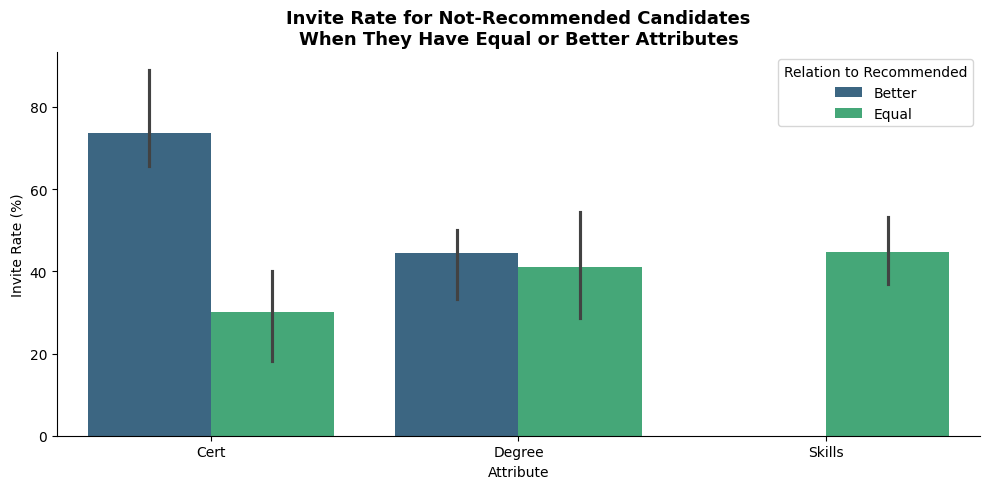

,User Group,% Invited the Better (Non-Recommended) Candidate,Number of Rounds with a Better Non-Recommended Option
2,predictions,56.022034,73
0,badge,44.565048,205
1,interactive,34.925595,138


In [36]:
# Only AI-enabled groups
df_ai = df_candidates[df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])].copy()

# Pair candidates by session + round
pairs = df_ai.merge(
    df_ai,
    on=['session_id', 'round_number'],
    suffixes=('_rec', '_nrec')
)

# Keep pairs where one is recommended and one is not
pairs = pairs[
    (pairs['recommended_rec'] == True) &
    (pairs['recommended_nrec'] == False) &
    (pairs['candidate_id_rec'] != pairs['candidate_id_nrec'])
]

# Comparison metrics
pairs['nrec_better_degree'] = pairs['degree_score_nrec'] > pairs['degree_score_rec']
pairs['nrec_equal_degree'] = pairs['degree_score_nrec'] == pairs['degree_score_rec']
pairs['nrec_better_skills'] = pairs['technical_skills_score_nrec'] > pairs['technical_skills_score_rec']
pairs['nrec_equal_skills'] = pairs['technical_skills_score_nrec'] == pairs['technical_skills_score_rec']
pairs['nrec_better_cert'] = pairs['certifications_score_nrec'] > pairs['certifications_score_rec']
pairs['nrec_equal_cert'] = pairs['certifications_score_nrec'] == pairs['certifications_score_rec']
pairs['invited_nrec'] = pairs['invited_nrec'] == True

# Melt for long format
melted = pairs.melt(
    id_vars=['user_group_rec', 'round_number', 'invited_nrec'],
    value_vars=[
        'nrec_better_degree', 'nrec_equal_degree',
        'nrec_better_skills', 'nrec_equal_skills',
        'nrec_better_cert', 'nrec_equal_cert'
    ],
    var_name='comparison',
    value_name='nrec_is_better_or_equal'
)

# Filter for when NREC is better or equal
melted = melted[melted['nrec_is_better_or_equal']]

# Clean up labels
melted['dimension'] = melted['comparison'].str.extract(r'nrec_(better|equal)_(.*)')[1].str.title()
melted['relation'] = melted['comparison'].str.extract(r'nrec_(better|equal)_')[0].str.title()

# Plot 1: Invite Rate by Group + Dimension
grouped = melted.groupby(['user_group_rec', 'dimension', 'relation']).agg(
    count=('invited_nrec', 'count'),
    invite_rate=('invited_nrec', 'mean')
).reset_index()
grouped['invite_rate'] *= 100

plt.figure(figsize=(10, 5))
sns.barplot(
    data=grouped,
    x='dimension',
    y='invite_rate',
    hue='relation',
    palette='viridis'
)
plt.title('Invite Rate for Not-Recommended Candidates\nWhen They Have Equal or Better Attributes', fontsize=13, fontweight='bold')
plt.ylabel('Invite Rate (%)')
plt.xlabel('Attribute')
plt.legend(title='Relation to Recommended')
sns.despine()
plt.tight_layout()
plt.show()

# Plot 2: Invite Trend Over Rounds
round_trend = melted.groupby(['round_number', 'user_group_rec']).agg(
    invite_share=('invited_nrec', 'mean'),
    count=('invited_nrec', 'count')
).reset_index()
round_trend['invite_share'] *= 100

round_trend_summary = (
    melted.groupby(['round_number', 'user_group_rec'])
    .agg(
        invite_rate_when_better_or_equal=('invited_nrec', 'mean'),
        count_cases=('invited_nrec', 'count')
    )
    .reset_index()
)

round_trend_summary['invite_rate_when_better_or_equal'] *= 100
round_trend_summary = round_trend_summary.rename(columns={
    'user_group_rec': 'user_group'
})

# Optional: sort by group and round
round_trend_summary = round_trend_summary.sort_values(['user_group', 'round_number']).reset_index(drop=True)
group_summary = (
    round_trend_summary
    .groupby('user_group')
    .agg(
        avg_invite_rate_when_better_or_equal=('invite_rate_when_better_or_equal', 'mean'),
        total_cases=('count_cases', 'sum')
    )
    .reset_index()
    .sort_values('avg_invite_rate_when_better_or_equal', ascending=False)
)
cleaned_summary = group_summary.rename(columns={
    'user_group': 'User Group',
    'avg_invite_rate_when_better_or_equal': '% Invited the Better (Non-Recommended) Candidate',
    'total_cases': 'Number of Rounds with a Better Non-Recommended Option'
})
cleaned_summary


> Do users succeed in flipping labels?

In [37]:
import statsmodels.formula.api as smf

# Prep: Only use manipulations where label changed (or could have)
df_manipulations['is_good_fit'] = df_manipulations['is_good_fit'].astype(bool)

# Define flips (True → False or False → True)
flips = df_manipulations.groupby(['session_id', 'round_number', 'candidate_id', 'changed_attribute']).agg(
    first_label=('is_good_fit', 'first'),
    last_label=('is_good_fit', 'last'),
    user_group=('user_group', 'first')
).reset_index()

flips['flip_success'] = flips['first_label'] != flips['last_label']

# Drop if user_group is missing
flip_df = flips.dropna(subset=['user_group'])

# --- 1. Chi-square test: Flip success by user group ---

group_flip_counts = flip_df.groupby('user_group')['flip_success'].value_counts().unstack(fill_value=0)

if group_flip_counts.shape[0] > 1 and (group_flip_counts > 0).all().all():
    chi2, p_value, _, _ = chi2_contingency(group_flip_counts)
    print("Chi-square Test: Do flip success rates differ by user group?")
    print(group_flip_counts)
    print(f"\nChi² = {chi2:.3f}, p = {p_value:.4f}")
else:
    print("Not enough group variability to run Chi-square test.")
    print(group_flip_counts)

# --- 2. Logistic regression: Predicting flip success ---

# Ensure correct dtypes
flip_df['flip_success'] = flip_df['flip_success'].astype(int)
flip_df['user_group'] = flip_df['user_group'].astype(str)
flip_df['changed_attribute'] = flip_df['changed_attribute'].astype(str)

try:
    model = smf.logit("flip_success ~ C(user_group) + C(changed_attribute)", data=flip_df).fit(disp=0)
    print("\nLogistic Regression Summary (Predicting Label Flip Success):")
    display(model.summary2().tables[1])
except Exception as e:
    print("Logistic regression could not be fitted:", str(e))

Not enough group variability to run Chi-square test.
flip_success  False  True 
user_group                
interactive      21      4

Logistic Regression Summary (Predicting Label Flip Success):


/Users/markuskuehnle/Documents/projects/bias-fairness-mvp/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-2.079442,1.060660,-1.960516,0.049935,-4.158297,-0.000586
C(changed_attribute)[T.gender],-21.075736,43551.914632,-0.000484,0.999614,-85381.259873,85339.108402
C(changed_attribute)[T.race],1.232144,1.265382,0.973733,0.330189,-1.247959,3.712246


### 3.4 Manipulation + Invite Correlation

> Are manipulated candidates more or less likely to be invited?

Compare invite rates of manipulated vs. non-manipulated candidates.

In [38]:
# Filter to interactive group
df_interactive = df_candidates[df_candidates['user_group'] == 'interactive'].copy()

# Ensure manipulation flag is boolean
df_interactive['manipulated'] = df_interactive['manipulated'].astype(bool)

# Compute invite rate per manipulation group
manip_invite_stats = df_interactive.groupby('manipulated').agg(
    total=('candidate_id', 'count'),
    invited=('invited', 'sum')
).reset_index()

manip_invite_stats['invite_rate'] = 100 * manip_invite_stats['invited'] / manip_invite_stats['total']
manip_invite_stats['Manipulated'] = manip_invite_stats['manipulated'].map({True: 'Yes', False: 'No'})
readable_stats = manip_invite_stats.rename(columns={
    'Manipulated': 'Was the Candidate Manipulated?',
    'invite_rate': 'Invite Rate (%)',
    'total': 'Number of Candidates',
    'invited': 'Number Invited'
})[[
    'Was the Candidate Manipulated?',
    'Invite Rate (%)',
    'Number of Candidates',
    'Number Invited'
]]

readable_stats

,Was the Candidate Manipulated?,Invite Rate (%),Number of Candidates,Number Invited
0,No,37.179487,78,29
1,Yes,66.666667,18,12


In [39]:
# Are manipulated candidates invited more or less?

# Build contingency table
contingency = pd.crosstab(df_interactive['manipulated'], df_interactive['invited'])

# Ensure proper group order: [not manipulated, manipulated]
contingency = contingency.reindex(index=[False, True])

# Run Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

# Wrap results in a readable table
chi_square_result = pd.DataFrame({
    'Metric': ['Chi-square statistic', 'Degrees of freedom', 'p-value'],
    'Value': [round(chi2, 3), dof, round(p_value, 4)]
})

print("Chi-square Test: Are manipulated candidates invited more or less (interactive group only)?")
display(contingency)
display(chi_square_result)

Chi-square Test: Are manipulated candidates invited more or less (interactive group only)?


invited,False,True
manipulated,,
False,49,29
True,6,12


,Metric,Value
0,Chi-square statistic,4.0620
1,Degrees of freedom,1.0000
2,p-value,0.0439


Participants in the interactive group were more likely to invite candidates they had manipulated. This suggests that manipulation increased trust or alignment with personal judgment, rather than reducing trust in the AI.

In [40]:
# TODO: Did group behavior differ across decision-making metrics?
# Create a clean summary table showing:
# Metric (e.g. trust rate, invite rate, flip success)
# p-value from statistical test
# Test type (e.g. chi-square, t-test)
# Interpretation (significant or not)

## 4. **Temporal Dynamics & Decision Fatigue**

### 4.1 Invite Trends Over Rounds
> Do participants become more selective over time?

- Avg. `invited_count` per round_index per user group
- Line plots for rounds 1 → N

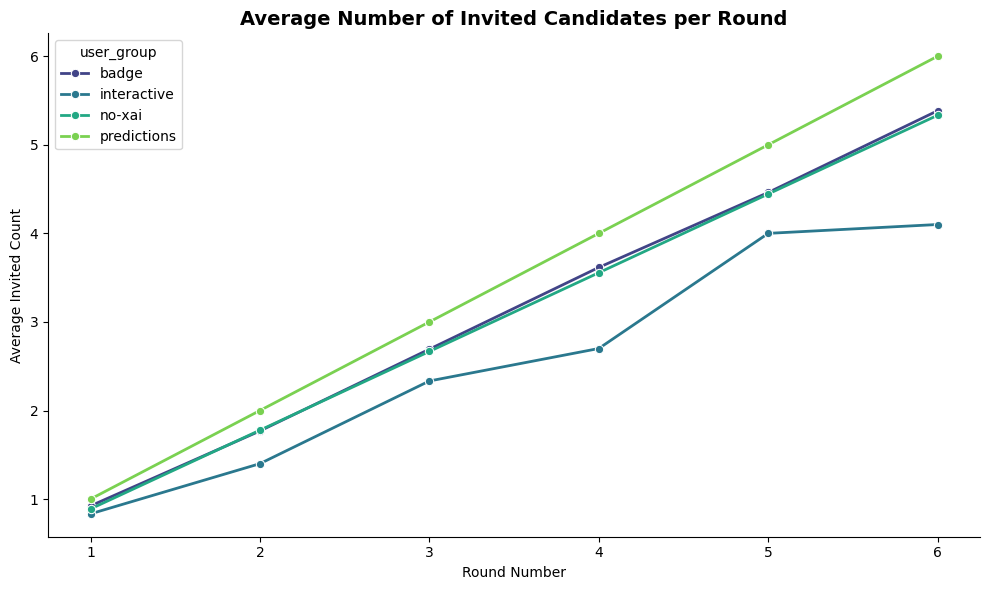

In [41]:
# Ensure invited_count is numeric
df_rounds['invited_count'] = pd.to_numeric(df_rounds['invited_count'], errors='coerce')

# Compute average invited count per round number and user group
invite_trends = df_rounds.groupby(['user_group', 'round_number']).agg(
    avg_invited_count=('invited_count', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=invite_trends,
    x='round_number',
    y='avg_invited_count',
    hue='user_group',
    marker='o',
    linewidth=2,
    palette='viridis'
)

sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Average Number of Invited Candidates per Round', fontsize=14, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Average Invited Count')
plt.xticks(invite_trends['round_number'].unique())
plt.tight_layout()
plt.show()

### 4.2 Round Duration Patterns
> Does decision time drop with fatigue?

- Avg. round duration by round index by user group

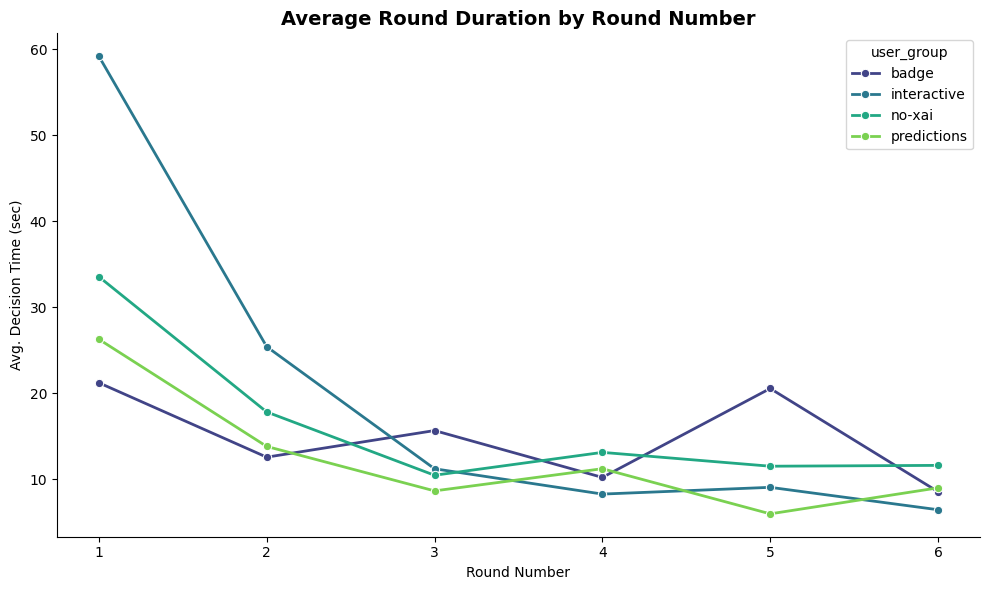

In [42]:
# Ensure round_duration is numeric
df_rounds['round_duration'] = pd.to_numeric(df_rounds['round_duration'], errors='coerce')

# Group and calculate average duration
duration_trends = df_rounds.groupby(['user_group', 'round_number']).agg(
    avg_round_duration=('round_duration', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=duration_trends,
    x='round_number',
    y='avg_round_duration',
    hue='user_group',
    marker='o',
    linewidth=2,
    palette='viridis'
)

# Style
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Average Round Duration by Round Number', fontsize=14, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Avg. Decision Time (sec)')
plt.xticks(duration_trends['round_number'].unique())
plt.tight_layout()
plt.show()

> For interactive user group, do they use the manipulation tool less in later rounds?

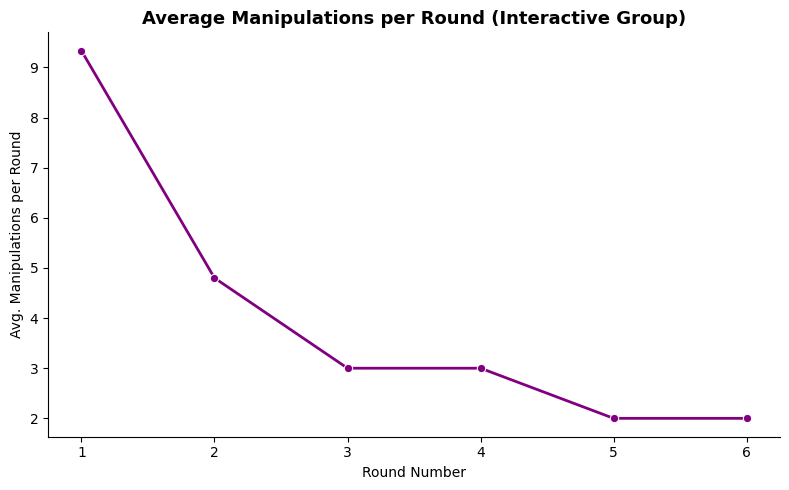

In [43]:
df_interactive = df_manipulations[df_manipulations['user_group'] == 'interactive']

# Count manipulations per session and round
per_session_counts = df_interactive.groupby(['session_id', 'round_number']).size().reset_index(name='manip_count')

# Average manipulations per round
manip_usage_avg = per_session_counts.groupby('round_number').agg(
    avg_manipulations=('manip_count', 'mean')
).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=manip_usage_avg, x='round_number', y='avg_manipulations', marker='o', linewidth=2, color='purple')
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Average Manipulations per Round (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Avg. Manipulations per Round')
plt.xticks(manip_usage_avg['round_number'].unique())
plt.tight_layout()
plt.show()

> In all usergroups with ai, can we see a behavior shift?

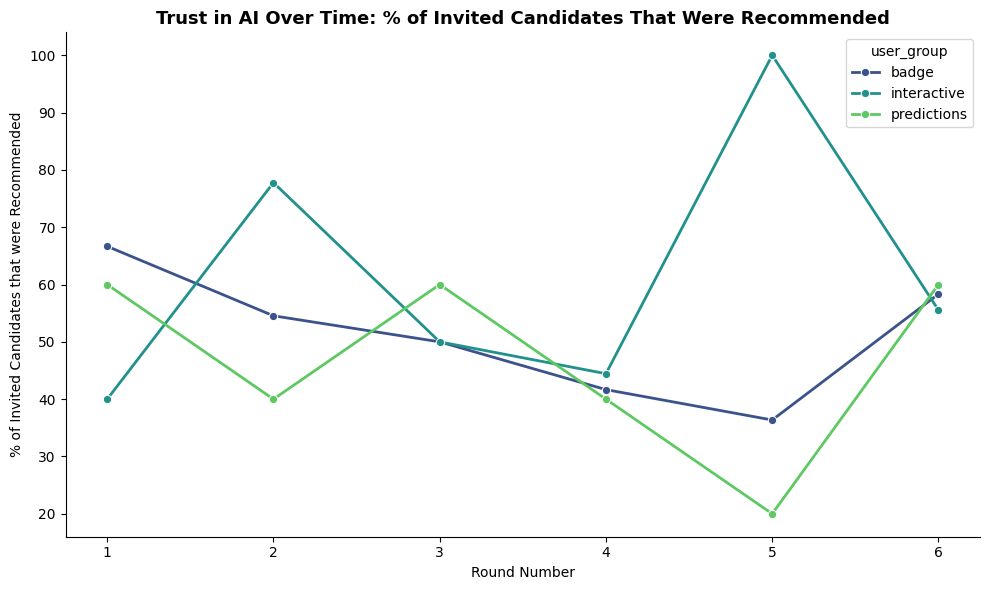

In [44]:
# 1. Filter AI-supported groups
ai_groups = ['predictions', 'interactive', 'badge']
df_ai = df_candidates[df_candidates['user_group'].isin(ai_groups)].copy()

# 2. Ensure correct dtypes
df_ai['invited'] = df_ai['invited'].astype(bool)
df_ai['recommended'] = df_ai['recommended'].astype(bool)

# 3. Filter to invited candidates only
invited = df_ai[df_ai['invited']]

# 4. Compute % of invited candidates that were recommended, per round and user group
trust_trend = invited.groupby(['user_group', 'round_number']).agg(
    recommended_invites=('recommended', 'sum'),
    total_invited=('recommended', 'count')
).reset_index()
trust_trend['pct_recommended'] = 100 * trust_trend['recommended_invites'] / trust_trend['total_invited']

# 5. Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=trust_trend, x='round_number', y='pct_recommended', hue='user_group', marker='o', linewidth=2, palette='viridis')
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Trust in AI Over Time: % of Invited Candidates That Were Recommended', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('% of Invited Candidates that were Recommended')
plt.xticks(trust_trend['round_number'].unique())
plt.tight_layout()
plt.show()

> When users manipulate candidates, are they less likely to invite the AI-recommended one?
In other words: does manual manipulation = lower AI trust?

                               combo  invited_rate  count
1          Recommended & Manipulated      0.666667     18
2      Recommended & Not Manipulated      0.433333     30
0  Not Recommended & Not Manipulated      0.333333     48


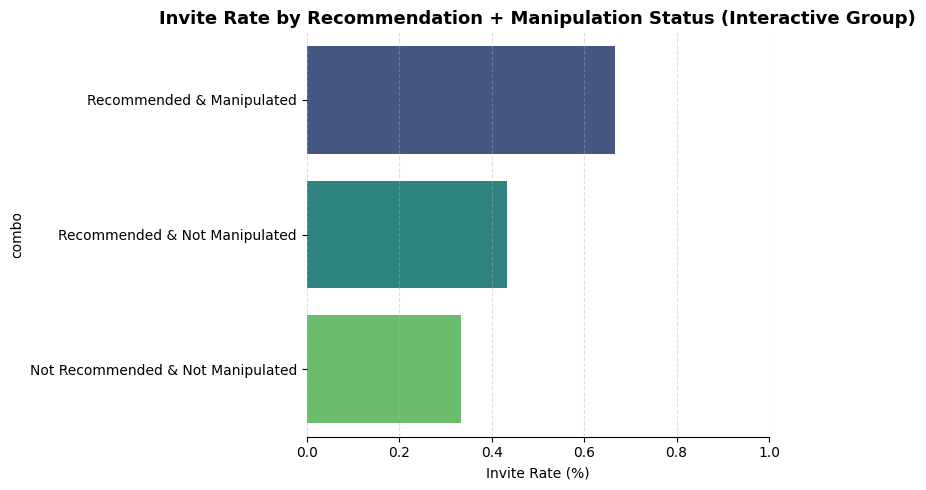

In [45]:
# Filter interactive group
df_int = df_candidates[df_candidates['user_group'] == 'interactive'].copy()

# Ensure booleans
df_int['invited'] = df_int['invited'].astype(bool)
df_int['recommended'] = df_int['recommended'].astype(bool)
df_int['manipulated'] = df_int['manipulated'].astype(bool)

# Create 2-way label: (recommended vs not) and (manipulated vs not)
df_int['combo'] = df_int.apply(
    lambda row: f"{'Recommended' if row['recommended'] else 'Not Recommended'} & "
                f"{'Manipulated' if row['manipulated'] else 'Not Manipulated'}",
    axis=1
)

# Compute invite rates per group
invite_behavior = df_int.groupby('combo').agg(
    invited_rate=('invited', 'mean'),
    count=('invited', 'count')
).reset_index().sort_values(by='invited_rate', ascending=False)

print(invite_behavior)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=invite_behavior,
    x='invited_rate',
    y='combo',
    hue='combo',           # Required when passing `palette`
    palette='viridis',
    legend=False           # Hide redundant legend
)
plt.xlabel('Invite Rate (%)')
plt.title('Invite Rate by Recommendation + Manipulation Status (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, top=True)
plt.tight_layout()
plt.show()


Each bar shows the **percentage of candidates invited**, based on two factors:
- Whether the **AI recommended** them
- Whether the **user manipulated** them

**Interpretation Framework:**

| Bar Label                             | What it Represents                                      | How to Interpret                                                             |
|--------------------------------------|----------------------------------------------------------|------------------------------------------------------------------------------|
| **Recommended & Not Manipulated**    | AI said "yes", user left it as-is                       | Baseline trust — invited because they trusted AI                          |
| **Recommended & Manipulated**        | AI said "yes", user **changed something**               | User might've doubted the AI — did manipulation reduce invite chance?     |
| **Not Recommended & Manipulated**    | AI said "no", but user **manually adjusted**            | Active override — user possibly trusted their own judgment more           |
| **Not Recommended & Not Manipulated**| AI said "no", and user left it that way                 | Expected lowest invite rate — full AI alignment                           |


**What patterns to look for:**

1. **Trust in AI**:
   - If `Recommended & Not Manipulated` has a **high invite rate** → users **trust the AI**
   - If `Recommended & Manipulated` has a **lower rate** → manipulation **reduces trust**

2. **Overrides**:
   - If `Not Recommended & Manipulated` has a **moderate or high rate** → users **override the AI** after edits

3. **Consistency**:
   - If `Not Recommended & Not Manipulated` has **very low invites** → users **rarely override without edits**

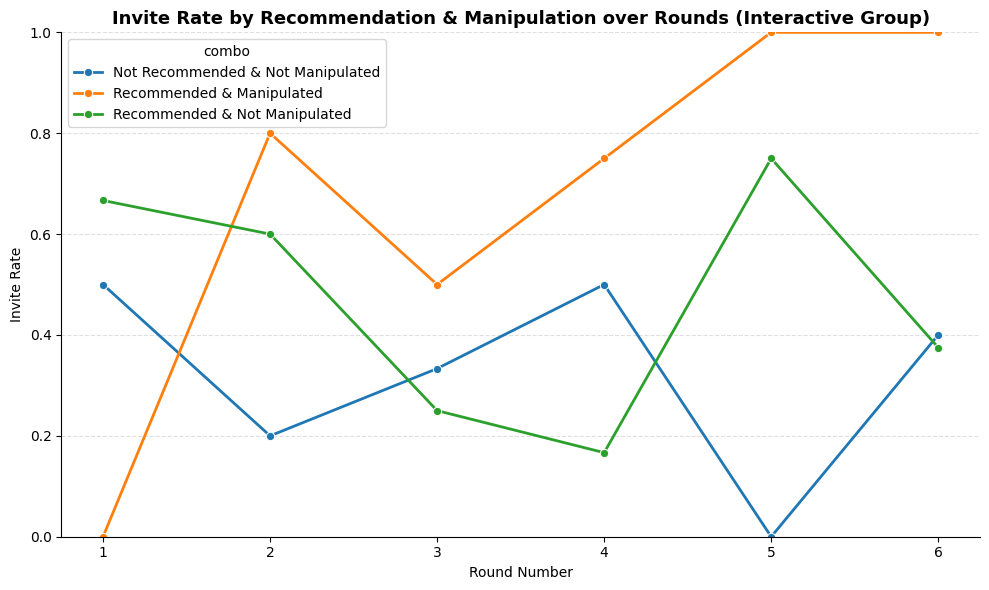

In [46]:
# Step 1: Prepare interactive data
df_int = df_candidates[df_candidates['user_group'] == 'interactive'].copy()
df_int['invited'] = df_int['invited'].astype(bool)
df_int['recommended'] = df_int['recommended'].astype(bool)
df_int['manipulated'] = df_int['manipulated'].astype(bool)

# Step 2: Create 2x2 combo label
df_int['combo'] = df_int.apply(
    lambda row: f"{'Recommended' if row['recommended'] else 'Not Recommended'} & "
                f"{'Manipulated' if row['manipulated'] else 'Not Manipulated'}",
    axis=1
)

# Step 3: Group by round and combo
invite_by_round = df_int.groupby(['round_number', 'combo']).agg(
    invited_rate=('invited', 'mean'),
    count=('invited', 'count')
).reset_index()

# Step 4: Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=invite_by_round,
    x='round_number',
    y='invited_rate',
    hue='combo',
    marker='o',
    linewidth=2
)
plt.title('Invite Rate by Recommendation & Manipulation over Rounds (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Invite Rate')
plt.ylim(0, 1)
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 4.3 Manipulation Timing Fatigue

> Do users manipulate less as rounds go on?

Already partially addressed — could expand with:
- Time between first and last manipulation
- Share of rounds that included manipulation (over time)

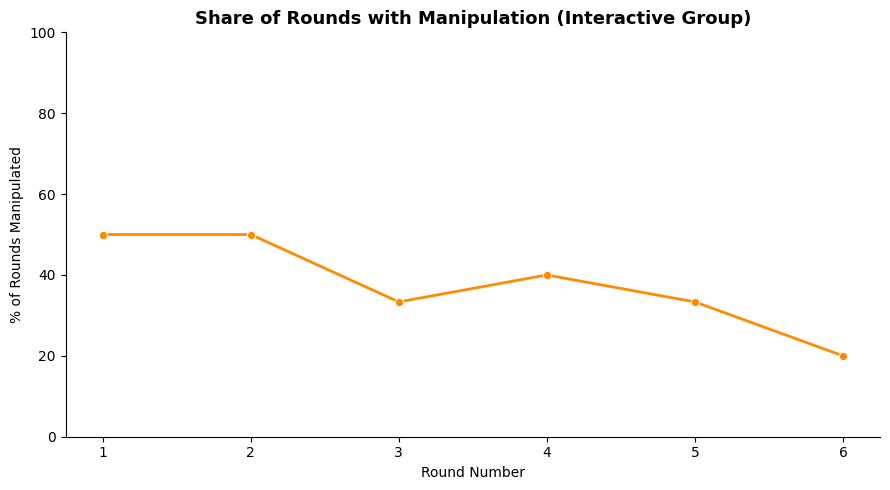

In [47]:
# Filter to interactive group only
df_manip_int = df_manipulations[df_manipulations['user_group'] == 'interactive']
df_rounds_int = df_rounds[df_rounds['user_group'] == 'interactive']

# Mark rounds with manipulation
manip_flags = df_manip_int.groupby(['session_id', 'round_number']).size().reset_index(name='manip_count')
manip_flags['was_manipulated'] = True

# Merge with all interactive rounds
rounds_with_manip_flag = df_rounds_int.merge(
    manip_flags[['session_id', 'round_number', 'was_manipulated']],
    on=['session_id', 'round_number'],
    how='left'
)

# Fill missing values = no manipulation
rounds_with_manip_flag['was_manipulated'] = rounds_with_manip_flag['was_manipulated'].fillna(False).astype(bool)

# Share of rounds with manipulation over time
manip_fatigue = rounds_with_manip_flag.groupby('round_number').agg(
    manipulated_rounds=('was_manipulated', 'sum'),
    total_rounds=('was_manipulated', 'count')
).reset_index()
manip_fatigue['share_manipulated'] = 100 * manip_fatigue['manipulated_rounds'] / manip_fatigue['total_rounds']

# Plot
plt.figure(figsize=(9, 5))
sns.lineplot(data=manip_fatigue, x='round_number', y='share_manipulated', marker='o', linewidth=2, color='darkorange')
sns.despine(top=True, right=True)
plt.grid(False)
plt.title('Share of Rounds with Manipulation (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('% of Rounds Manipulated')
plt.xticks(manip_fatigue['round_number'].unique())
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### 4.4 Early Decision Bias

> Are users more likely to invite the first candidate shown in each round?

Could reflect position bias / cognitive shortcuts

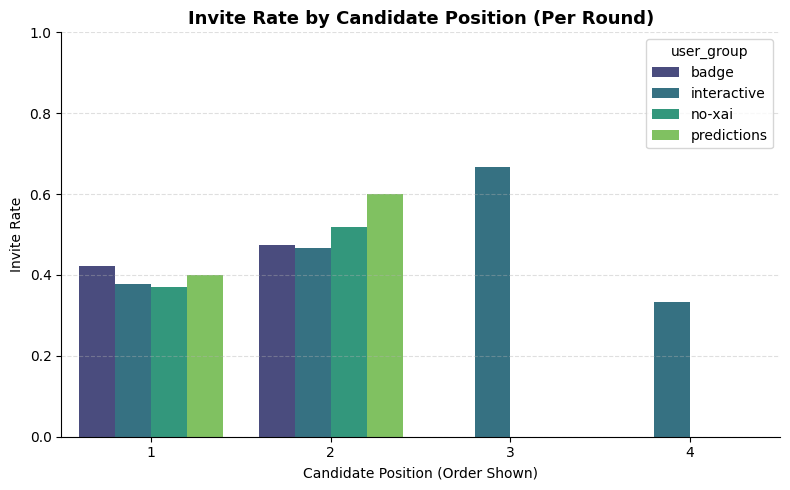

In [48]:
# Filter to relevant fields
df_pos_bias = df_candidates[['session_id', 'round_number', 'candidate_id', 'invited', 'user_group']].copy()

# Assign candidate position (1 or 2) within each round
df_pos_bias['position'] = df_pos_bias.groupby(['session_id', 'round_number']).cumcount() + 1

# Group by position and user group → calculate invite rate
position_bias = df_pos_bias.groupby(['user_group', 'position']).agg(
    invited_rate=('invited', 'mean'),
    count=('invited', 'count')
).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=position_bias, x='position', y='invited_rate', hue='user_group', palette='viridis')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0, 1)
plt.title('Invite Rate by Candidate Position (Per Round)', fontsize=13, fontweight='bold')
plt.xlabel('Candidate Position (Order Shown)')
plt.ylabel('Invite Rate')
plt.tight_layout()
plt.show()

---

## 5. **Between-Group Behavioral Comparison**

### 5.1 Invite Ratio by Group
> Are some groups more generous or cautious?

```
invite_rate = # invited / total candidates
→ Grouped by user_group
```

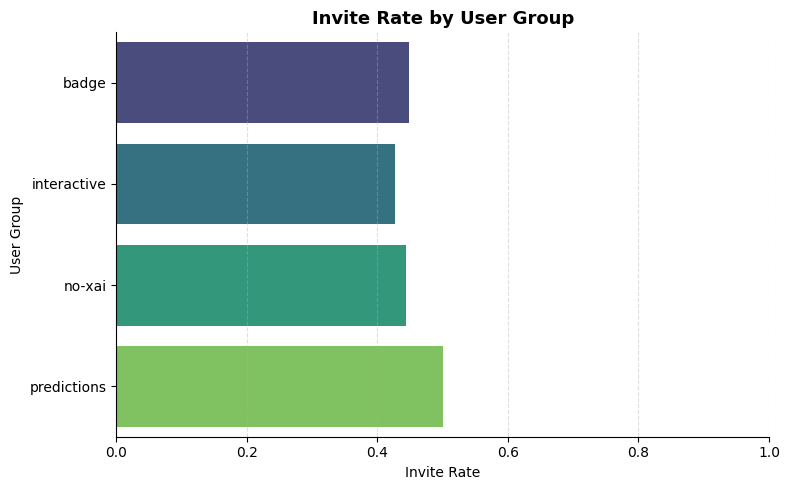

In [49]:
# Ensure 'invited' is boolean
df_candidates['invited'] = df_candidates['invited'].astype(bool)

# Compute invite ratio per user group
invite_ratio = df_candidates.groupby('user_group').agg(
    total_candidates=('candidate_id', 'count'),
    total_invited=('invited', 'sum')
).reset_index()

invite_ratio['invite_rate'] = invite_ratio['total_invited'] / invite_ratio['total_candidates']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=invite_ratio,
    x='invite_rate',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(0, 1)
plt.xlabel('Invite Rate')
plt.ylabel('User Group')
plt.title('Invite Rate by User Group', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.2 Recommendation Acceptance Rate by Group
> Do explanations increase trust?

```
accept_rate = # invited & recommended / # recommended
→ Grouped by user_group
```

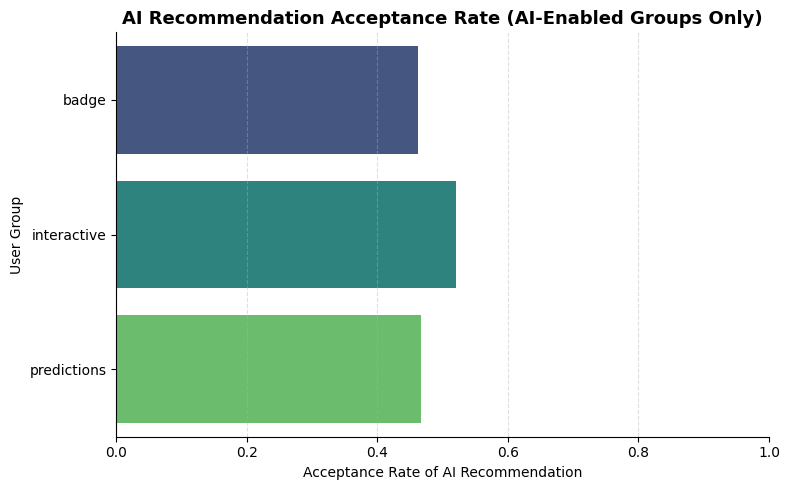

In [50]:
# Ensure booleans are correct
df_candidates['recommended'] = df_candidates['recommended'].astype(bool)
df_candidates['invited'] = df_candidates['invited'].astype(bool)

# Filter to AI-supported groups only (those that received recommendations)
ai_groups = ['badge', 'predictions', 'interactive']
df_ai = df_candidates[df_candidates['user_group'].isin(ai_groups)]

# Filter to recommended candidates
recommended_df = df_ai[df_ai['recommended']]

# Compute acceptance rate
rec_acceptance_rate = recommended_df.groupby('user_group').agg(
    invited_recommended=('invited', 'sum'),
    total_recommended=('invited', 'count')
).reset_index()

rec_acceptance_rate['accept_rate'] = rec_acceptance_rate['invited_recommended'] / rec_acceptance_rate['total_recommended']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=rec_acceptance_rate,
    x='accept_rate',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(0, 1)
plt.xlabel('Acceptance Rate of AI Recommendation')
plt.ylabel('User Group')
plt.title('AI Recommendation Acceptance Rate (AI-Enabled Groups Only)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.3 Reversal Decisions (AI Distrust Cases)

> How often do users invite the non-recommended candidate?

That shows a lack of trust or a deliberate override — regardless of whether the override was successful.

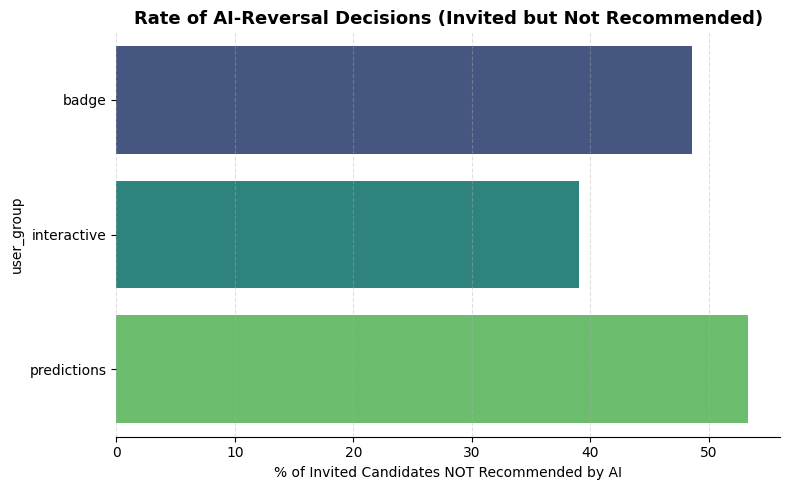

In [51]:
# Only AI-enabled groups
df_ai = df_candidates[df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])].copy()

# Count how often non-recommended candidates were invited
reversal_cases = df_ai[
    (df_ai['invited']) & (~df_ai['recommended'])
]

# Per group
reversal_stats = reversal_cases.groupby('user_group').agg(
    reversals=('candidate_id', 'count')
).reset_index()

# Total invited per group
total_invited = df_ai[df_ai['invited']].groupby('user_group').agg(
    total=('candidate_id', 'count')
).reset_index()

# Merge + compute reversal rate
reversal_stats = reversal_stats.merge(total_invited, on='user_group')
reversal_stats['reversal_rate'] = 100 * reversal_stats['reversals'] / reversal_stats['total']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=reversal_stats, x='reversal_rate', y='user_group', hue='user_group', palette='viridis', legend=False)
sns.despine(left=True, top=True)
plt.xlabel('% of Invited Candidates NOT Recommended by AI')
plt.title('Rate of AI-Reversal Decisions (Invited but Not Recommended)', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 5.5 Skipping Behavior

> Do some groups skip rounds more often?

In [52]:
# skip_summary = round_skips.groupby('user_group').agg(
#     skipped_rounds=('skipped', 'sum'),
#     total_rounds=('skipped', 'count')
# ).reset_index()

# skip_summary['skip_rate'] = 100 * skip_summary['skipped_rounds'] / skip_summary['total_rounds']

# plt.figure(figsize=(8, 5))
# sns.barplot(
#     data=skip_summary,
#     x='skip_rate',
#     y='user_group',
#     hue='user_group',
#     palette='viridis',
#     legend=False
# )
# sns.despine(left=True, top=True)
# plt.xlabel('% of Skipped Rounds')
# plt.title('Skipping Behavior by Group', fontsize=13, fontweight='bold')
# plt.grid(axis='x', linestyle='--', alpha=0.4)
# plt.tight_layout()
# plt.show()

### 5.6 Decision Time per Round

> Do explanation groups take longer to decide?

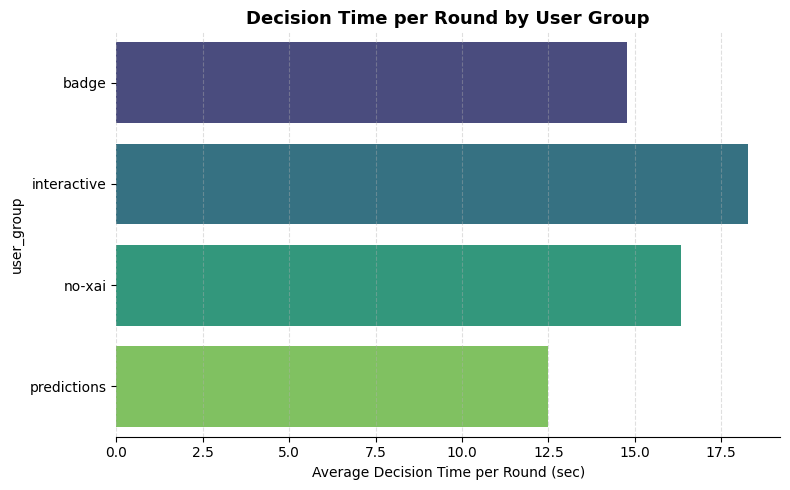

In [53]:
decision_times = df_rounds[['user_group', 'round_duration']].copy()
decision_time_summary = decision_times.groupby('user_group').agg(
    avg_round_duration=('round_duration', 'mean')
).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=decision_time_summary,
    x='avg_round_duration',
    y='user_group',
    hue='user_group',
    palette='viridis',
    legend=False
)
sns.despine(left=True, top=True)
plt.xlabel('Average Decision Time per Round (sec)')
plt.title('Decision Time per Round by User Group', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

---

## 6. **Bias & Fairness Analysis**

### 6.1 Demographic Breakdown of Invitations
> Who gets invited?

- Distributions (race, sex, age) among invited vs. not invited
- Compare to overall candidate pool


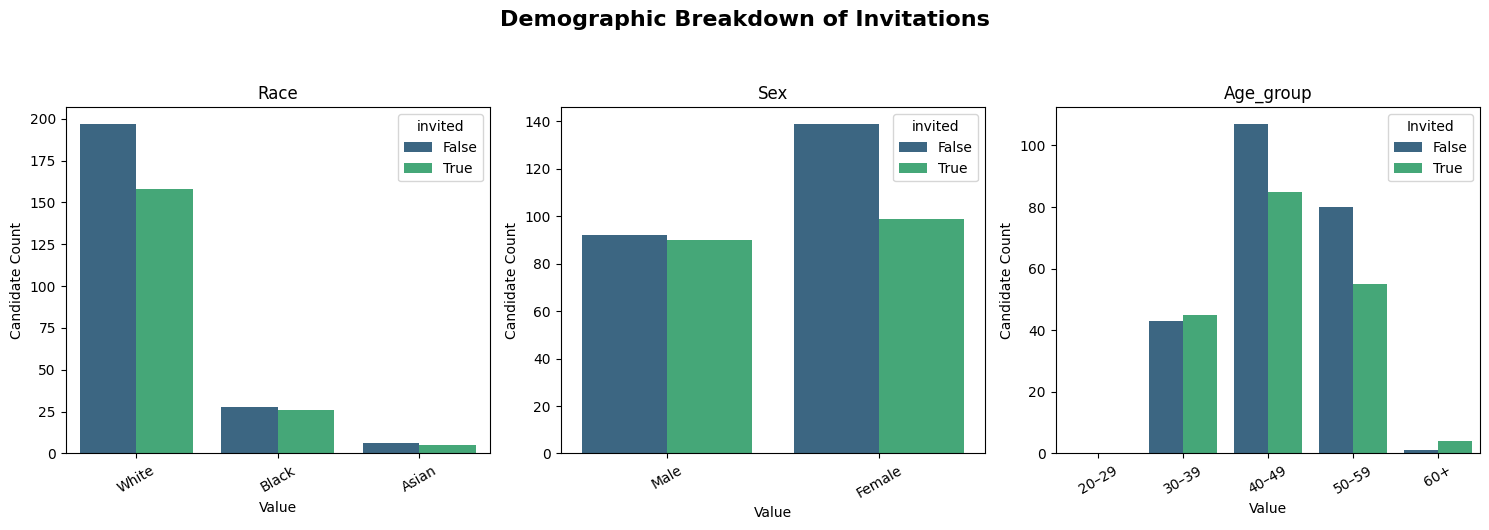

In [54]:
# Ensure booleans + age groups
df_candidates['invited'] = df_candidates['invited'].astype(bool)
df_candidates['age_group'] = pd.cut(
    df_candidates['age'],
    bins=[19, 29, 39, 49, 59, 100],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

# Define demographic attributes and their correct categories
demo_attributes = {
    'race': ["White", "Black", "Asian"],
    'sex': ["Male", "Female"],
    'age_group': ["20–29", "30–39", "40–49", "50–59", "60+"]
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Loop through each attribute and create a subplot
for i, (attr, categories) in enumerate(demo_attributes.items()):
    # Filter and clean data
    data = df_candidates[[attr, 'invited']].dropna()
    data = data[data[attr].isin(categories)]

    sns.countplot(
        data=data,
        x=attr,
        hue='invited',
        palette='viridis',
        ax=axes[i],
        order=categories
    )
    axes[i].set_title(attr.capitalize())
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Candidate Count")
    axes[i].tick_params(axis='x', rotation=30)

# Adjust layout
plt.suptitle("Demographic Breakdown of Invitations", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.legend(title="Invited")
plt.show()

> Which Attribute is mostly changed when using manipulation?

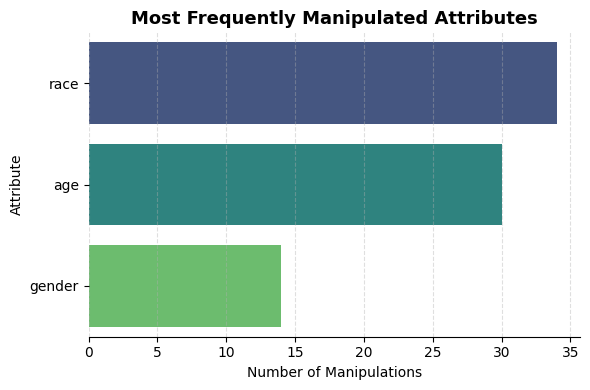

In [55]:
# Count manipulated attributes
manip_attr_freq = (
    df_manipulations['changed_attribute']
    .value_counts()
    .reset_index()
)
manip_attr_freq.columns = ['Attribute', 'Count']  # explicit renaming

plt.figure(figsize=(6, 4))
sns.barplot(
    data=manip_attr_freq,
    x='Count',
    y='Attribute',
    hue='Attribute',
    palette='viridis',
    legend=False    
)
plt.title("Most Frequently Manipulated Attributes", fontsize=13, fontweight='bold')
plt.xlabel("Number of Manipulations")
plt.ylabel("Attribute")
sns.despine(left=True, top=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 6.2 Bias Disparity Metrics
> Are some groups disproportionately excluded?

- Representation ratio: 
```
% of invited from group / % of total from group
```
- Optional: Chi-squared test or disparity scores


In [56]:
# Ensure booleans and clean age groups
df_candidates['invited'] = df_candidates['invited'].astype(bool)
df_candidates['age_group'] = pd.cut(
    df_candidates['age'],
    bins=[19, 29, 39, 49, 59, 100],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

# Variables to analyze
demo_vars = ['race', 'sex', 'age_group']

# Collect disparity data
disparity_data = []

for attr in demo_vars:
    total_dist = df_candidates[attr].value_counts(normalize=True)
    invited_dist = df_candidates[df_candidates['invited']][attr].value_counts(normalize=True)

    # Combine both and compute ratio
    disparity = pd.concat([invited_dist, total_dist], axis=1, keys=['invited_pct', 'total_pct']).fillna(0)
    disparity['representation_ratio'] = disparity['invited_pct'] / disparity['total_pct']
    disparity['attribute'] = attr
    disparity['group'] = disparity.index

    disparity_data.append(disparity.reset_index(drop=True))

# Combine all
disparity_df = pd.concat(disparity_data, ignore_index=True)

In [57]:
disparity_df

,invited_pct,total_pct,representation_ratio,attribute,group
0,0.835979,0.845238,0.989045,race,White
1,0.137566,0.128571,1.069959,race,Black
2,0.026455,0.026190,1.010101,race,Asian
3,0.523810,0.566667,0.924370,sex,Female
4,0.476190,0.433333,1.098901,sex,Male
5,0.449735,0.457143,0.983796,age_group,40–49
6,0.291005,0.321429,0.905350,age_group,50–59
7,0.238095,0.209524,1.136364,age_group,30–39
8,0.021164,0.011905,1.777778,age_group,60+
9,0.000000,0.000000,NaN,age_group,20–29


### 6.3 Targeted Attribute Manipulation by Demographic

> Are certain user groups more likely to change sensitive attributes (e.g. race, age)?

Cross-tab between user group, manipulated attribute, and candidate demographic.


In [58]:
# Only interactive group has manipulation access
df_int_manip = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()

# Join with original candidate demographics
df_int_demo = df_int_manip.merge(
    df_candidates[['candidate_id', 'sex', 'race', 'age']],
    on='candidate_id',
    how='left'
)

# Bin age for consistency
df_int_demo['age_group'] = pd.cut(
    df_int_demo['age'],
    bins=[19, 29, 39, 49, 59, 100],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

# Melt demographics into long form for easy crosstab
demo_long = df_int_demo.melt(
    id_vars=['changed_attribute'],
    value_vars=['race', 'sex', 'age_group'],
    var_name='demographic_type',
    value_name='demographic_value'
)

# Count manipulations by (changed_attribute x demographic_type x value)
manip_demo_ct = demo_long.groupby(
    ['changed_attribute', 'demographic_type', 'demographic_value']
).size().reset_index(name='count')


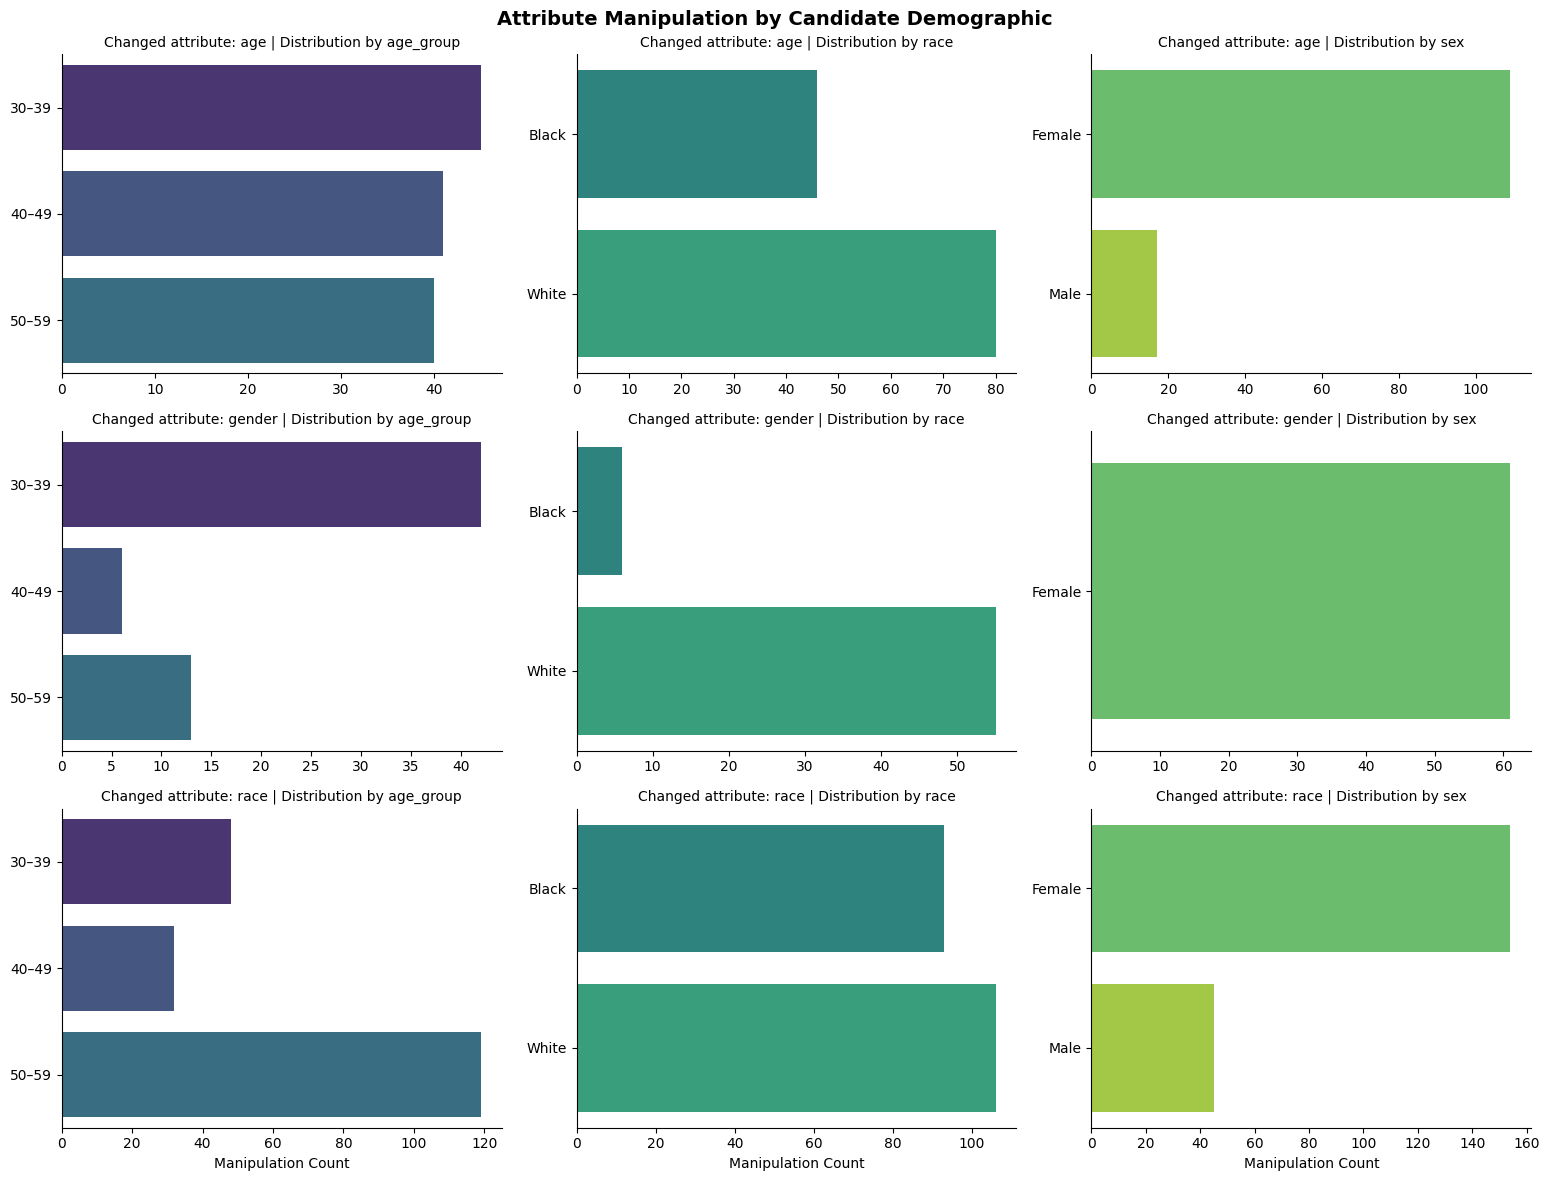

In [59]:
g = sns.catplot(
    data=manip_demo_ct,
    kind='bar',
    x='count',
    y='demographic_value',
    hue='demographic_value',  # Add this to satisfy the future requirement
    col='demographic_type',
    row='changed_attribute',
    palette='viridis',
    height=4,
    aspect=1.3,
    sharex=False,
    sharey=False,
    legend=False  # Optional: legend adds nothing, so we disable
)
g.set_axis_labels("Manipulation Count", "")
g.set_titles(row_template="Changed attribute: {row_name}", col_template="Distribution by {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Attribute Manipulation by Candidate Demographic", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

## 7. **Exploratory Metrics**

### 7.1 Hover Behavior
> Do users engage with SHAP/XAI features?

- Total hovers per feature
- Avg. hover duration


In [60]:
# # Filter to interactive group and explode hover_events
# df_hover = df_candidates[df_candidates['user_group'] == 'interactive'].copy()
# hover_data = df_hover.explode('hover_events')
# hover_data = hover_data.dropna(subset=['hover_events'])

# # Normalize dicts into DataFrame
# hover_df = pd.json_normalize(hover_data['hover_events'])
# hover_df['session_id'] = hover_data['session_id'].values 
# hover_df = hover_df.rename(columns={
#     'feature': 'feature',
#     'hover_duration': 'duration'
# })

# # Summary stats
# hover_summary = hover_df.groupby('feature').agg(
#     total_hovers=('duration', 'count'),
#     avg_duration=('duration', 'mean')
# ).sort_values('total_hovers', ascending=False).reset_index()

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=hover_summary,
    x='total_hovers',
    y='feature',
    hue='feature',     
    palette='viridis',
    legend=False         
)
plt.title("Total SHAP/XAI Hovers by Feature (Interactive Group)", fontsize=13, fontweight='bold')
plt.xlabel("Total Hovers")
plt.ylabel("Feature")
plt.tight_layout()  
plt.show()

NameError: name 'hover_summary' is not defined

<Figure size 800x500 with 0 Axes>

> Avg number of hovers per round?

In [ ]:
df_hover = df_candidates[df_candidates['user_group'] == 'interactive'].copy()
df_hover['hover_count'] = df_hover['hover_events'].apply(lambda x: len(x) if isinstance(x, list) else 0)

hover_per_round = df_hover.groupby(['session_id', 'round_number']).agg(
    total_hovers=('hover_count', 'sum')
).reset_index()

avg_hover_per_round = hover_per_round.groupby('round_number').agg(
    avg_hovers=('total_hovers', 'mean')
).reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_hover_per_round, x='round_number', y='avg_hovers', marker='o', linewidth=2, color='purple')
sns.despine()
plt.grid(True, linestyle='--', alpha=0.3)
plt.title('Average Number of Feature Hovers per Round (Interactive Group)', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Average Hovers')
plt.tight_layout()
plt.show()

### 7.2 Manipulation Sequences
> Complex manipulation strategies?

- Sequence of changed attributes
- Manipulation timing patterns

In [ ]:
from collections import Counter

# Filter only interactive group with actual manipulations
manip_seqs = df_manipulations[df_manipulations['user_group'] == 'interactive'].copy()

# Sort manipulations by time to get correct sequence
manip_seqs = manip_seqs.sort_values(['session_id', 'round_number', 'candidate_id', 'timestamp'])

# Group into ordered lists of attribute changes per candidate
sequences = (
    manip_seqs.groupby(['session_id', 'round_number', 'candidate_id'])['changed_attribute']
    .apply(list)
)

# Count most frequent sequences
sequence_counts = Counter(tuple(seq) for seq in sequences)
most_common_seqs = pd.DataFrame(sequence_counts.most_common(10), columns=['Sequence', 'Count'])
most_common_seqs

In [ ]:
manip_counts = sequences.apply(len)

plt.figure(figsize=(6, 4))
sns.histplot(manip_counts, bins=range(1, manip_counts.max() + 2), color='mediumseagreen')
plt.title('Number of Attribute Changes per Candidate', fontsize=13, fontweight='bold')
plt.xlabel('Number of Changes')
plt.ylabel('Number of Candidates')
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
df_manipulations['timestamp'] = pd.to_datetime(df_manipulations['timestamp'])

time_span = df_manipulations[df_manipulations['user_group'] == 'interactive'].groupby(
    ['session_id', 'round_number', 'candidate_id']
).agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
)

time_span['duration_secs'] = (time_span['end_time'] - time_span['start_time']).dt.total_seconds()

plt.figure(figsize=(6.5, 4))
sns.histplot(time_span['duration_secs'], bins=20, color='slateblue')
plt.title('Duration Between First and Last Manipulation', fontsize=13, fontweight='bold')
plt.xlabel('Seconds')
plt.ylabel('Number of Candidates')
sns.despine()
plt.tight_layout()
plt.show()


### 7.3 Hover-to-Invite Correlation

> Do users who hover longer or on more features trust the AI more?

Correlate total hover duration with recommendation acceptance rate.

In [ ]:
from itertools import chain

# Extract hover events into flat structure
hover_summary = []
for _, row in df_candidates[df_candidates['user_group'] == 'interactive'].iterrows():
    hovers = row['hover_events']
    if not hovers or not isinstance(hovers, list):
        continue
    for event in hovers:
        hover_summary.append({
            'session_id': row['session_id'],
            'round_number': row['round_number'],
            'candidate_id': row['candidate_id'],
            'duration': event.get('hover_duration', 0),
            'feature': event.get('feature')
        })

df_hovers = pd.DataFrame(hover_summary)

# Aggregate hover behavior per candidate
hover_agg = df_hovers.groupby(['session_id', 'round_number', 'candidate_id']).agg(
    total_hover_duration=('duration', 'sum'),
    num_hovered_features=('feature', 'nunique')
).reset_index()

# Merge with candidate metadata
hover_analysis = df_candidates[df_candidates['user_group'] == 'interactive'][[
    'session_id', 'round_number', 'candidate_id', 'recommended', 'invited'
]].merge(
    hover_agg,
    on=['session_id', 'round_number', 'candidate_id'],
    how='left'
)

# Filter to recommended candidates only
hover_analysis = hover_analysis[hover_analysis['recommended'] == True].copy()

# Fill NaNs (for candidates with no hovers) with 0
hover_analysis[['total_hover_duration', 'num_hovered_features']] = hover_analysis[[
    'total_hover_duration', 'num_hovered_features'
]].fillna(0)

# Keep only candidates with non-zero hover interaction
hover_valid = hover_analysis[
    (hover_analysis['total_hover_duration'] > 0) |
    (hover_analysis['num_hovered_features'] > 0)
].copy()
hover_valid['invited'] = hover_valid['invited'].astype(int)

# Plot: Hover duration vs invite
plt.figure(figsize=(7, 4.5))
sns.regplot(
    data=hover_valid,
    x='total_hover_duration',
    y='invited',
    logistic=True,
    scatter_kws={'alpha': 0.3},
    color='mediumseagreen'
)
plt.xlabel('Total Hover Duration (s)')
plt.ylabel('Probability of Inviting Recommended Candidate')
plt.title('Hover Duration vs. Recommendation Acceptance', fontsize=13, fontweight='bold')
plt.ylim(0, 1)
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Pearson correlation (hover duration and invite rate)
if hover_valid['invited'].nunique() > 1:
    corr_duration = hover_valid[['total_hover_duration', 'invited']].corr().iloc[0, 1]
    corr_features = hover_valid[['num_hovered_features', 'invited']].corr().iloc[0, 1]
    print(f"Correlation between hover duration and invite: {corr_duration:.2f}")
    print(f"Correlation between number of hovered features and invite: {corr_features:.2f}")
else:
    print("Not enough variation in invite values to compute correlation.")

---

## 8. Meta-Behavioral Patterns & Strategy Shifts
Capture higher-order behavioral strategies and adaptability


### 8.1 Strategy Switches

Do users switch from trusting to ignoring the AI over rounds?


In [ ]:
# Only interactive or AI-enabled users
df_strat = df_candidates[
    df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])
].copy()

# Identify if recommendation was followed per round
df_strat['followed_ai'] = df_strat['recommended'] & df_strat['invited']

# Filter to only recommended candidates (one per round)
recommended_rounds = df_strat[df_strat['recommended']].copy()

# Compute average follow rate per round and user group
avg_trust = recommended_rounds.groupby(['user_group', 'round_number']).agg(
    avg_followed=('followed_ai', 'mean')
).reset_index()

# Plot mean lines per user group
plt.figure(figsize=(8, 4.5))
sns.lineplot(
    data=avg_trust,
    x='round_number',
    y='avg_followed',
    hue='user_group',
    palette='viridis',
    linewidth=2.5,
    marker='o'
)
plt.title('AI Recommendation Acceptance Over Rounds', fontsize=13, fontweight='bold')
plt.xlabel('Round Number')
plt.ylabel('Share of Users Who Followed AI')
plt.ylim(-0.05, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='User Group')
sns.despine()
plt.tight_layout()
plt.show()


### 8.2 User Archetypes

Can we cluster users into types (e.g. conformists, skeptics, experimenters)?

Optional, but could be a powerful discussion anchor

Use session-level metrics like:
- Trust rate (recommendation alignment)
- Manipulation frequency
- Invite generosity
- Hover time

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Sessions from AI-enabled groups
sessions = df_candidates[df_candidates['user_group'].isin(['badge', 'predictions', 'interactive'])].copy()

# Trust rate per session
sessions['followed_ai'] = sessions['recommended'] & sessions['invited']
trust = sessions[sessions['recommended']].groupby('session_id')['followed_ai'].mean().rename('trust_rate')

# Invite rate per session
invite_rate = sessions.groupby('session_id')['invited'].mean().rename('invite_rate')

# Manipulation frequency
manip_count = df_manipulations.groupby('session_id').size().rename('manip_count')
rounds_per_session = df_rounds.groupby('session_id').size().rename('num_rounds')
manip_freq = (manip_count / rounds_per_session).rename('manip_freq')

# Hover duration per session
hover_summary = []
for _, row in df_candidates[df_candidates['user_group'] == 'interactive'].iterrows():
    for event in row.get('hover_events', []):
        hover_summary.append({
            'session_id': row['session_id'],
            'duration': event.get('hover_duration', 0)
        })
df_hovers = pd.DataFrame(hover_summary)
hover_time = df_hovers.groupby('session_id')['duration'].mean().rename('hover_time_avg')

# Combine all features
user_features = pd.concat([trust, invite_rate, manip_freq, hover_time], axis=1).fillna(0)

# Standardize and cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_features)

kmeans = KMeans(n_clusters=3, random_state=42)
user_features['cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
user_features[['pca_1', 'pca_2']] = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=user_features, x='pca_1', y='pca_2', hue='cluster', palette='viridis', s=70)
plt.title('User Archetypes Based on Session Behavior', fontsize=13, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame of PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=user_features.columns[:4]  # trust_rate, invite_rate, manip_freq, hover_time_avg
)

print("PCA Component Loadings:")
display(loadings)

In [ ]:
# Merge clusters into session-level data
session_meta = df_candidates[['session_id', 'round_number', 'invited', 'recommended']].copy()
session_meta = session_meta.merge(user_features['cluster'], on='session_id', how='left')

# 1. Invite rate per cluster
invite_rate = session_meta.groupby('cluster')['invited'].mean()

# 2. Skip rate (no one invited in a round)
skip_flags = df_rounds.copy()
skip_flags['skip'] = skip_flags['invited_count'] == 0
skip_flags = skip_flags.merge(user_features['cluster'], on='session_id')
skip_rate = skip_flags.groupby('cluster')['skip'].mean()

# 3. Recommendation acceptance rate
df_candidates['followed_ai'] = df_candidates['recommended'] & df_candidates['invited']
rec_acceptance = df_candidates[df_candidates['recommended']].merge(user_features['cluster'], on='session_id')
rec_acceptance_rate = rec_acceptance.groupby('cluster')['followed_ai'].mean()

# 4. Reversals: Recommended → Manipulated → Not Invited
manip_reversals = df_manipulations.merge(
    df_candidates[['session_id', 'round_number', 'candidate_id', 'invited', 'recommended']],
    on=['session_id', 'round_number', 'candidate_id']
)
manip_reversals = manip_reversals[
    (manip_reversals['recommended']) & (~manip_reversals['invited'])
].merge(user_features['cluster'], on='session_id')
reversal_rate = manip_reversals.groupby('cluster').size() / user_features.groupby('cluster').size()

# 5. Avg round time
round_time = df_rounds.merge(user_features['cluster'], on='session_id')
avg_round_time = round_time.groupby('cluster')['round_duration'].mean()

# Combine into one DataFrame
scorecard = pd.DataFrame({
    'Invite Rate': invite_rate,
    'Skip Rate': skip_rate,
    'Recommendation Acceptance': rec_acceptance_rate,
    'Reversal Rate': reversal_rate,
    'Avg Round Time': avg_round_time
}).round(2)

scorecard